In [1]:
import pandas as pd
import numpy as np
from lxml import etree
from io import StringIO, BytesIO
import datetime as dt
import psycopg2
import pyreadstat
import matplotlib.pyplot as plt
import scipy.spatial
from matplotlib.pyplot import figure
from pandas.plotting import register_matplotlib_converters
pd.set_option('display.max_columns', 500)
import sys
import random
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

## NPR data
Visitors

In [2]:
srvr = '213.187.246.217'
dbs = ['parkeerrechten'] 

# credentials
usr = 'mbisseling'
pw = 'kKVEnRuoaooZKok4e7Dy'

In [3]:
# connect with server
conn = psycopg2.connect(host=srvr, user=usr, password=pw, dbname=dbs[0])

In [4]:
# get tables names
q = '''
SELECT * FROM public."BACKUP_VW_0363"
WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13010
OR "BACKUP_VW_0363"."VERK_P_V_RECHT"= 13011
OR "BACKUP_VW_0363"."VERK_P_V_RECHT"=13012 
OR "BACKUP_VW_0363"."VERK_P_V_RECHT"=13022
OR "BACKUP_VW_0363"."VERK_P_V_RECHT"=13025
OR "BACKUP_VW_0363"."VERK_P_V_RECHT"=13026
OR "BACKUP_VW_0363"."VERK_P_V_RECHT"=13028
'''
tables = pd.read_sql_query(q, conn)

In [5]:
tables

VERW_RECHT_ID LAND_C_V_RECHT  VERK_P_V_RECHT VERK_PUNT_OMS  \
0        2.380087e+09                        13025.0          None   
1        4.833747e+09                        13022.0          None   
2        6.878467e+09                        13010.0          None   
3        1.819568e+09                        13022.0          None   
4        3.407497e+09                        13022.0          None   
5        6.896787e+09                        13010.0          None   
6        5.844128e+09                        13028.0          None   
7        1.033449e+09                        13025.0          None   
8        6.463539e+09             NL         13025.0          None   
9        7.210459e+09                        13028.0          None   
10       5.256479e+09                        13026.0          None   
11       5.627640e+09                        13028.0          None   
12       6.951089e+09                        13022.0          None   
13       7.681106e+08                        13028.0          None   
14       1.984580e+09             NL         13012.0          None   
15       9.050500e+09             NL         13028.0          None   
16       1.153301e+09                        13010.0          None   
17       8.364611e+09                        13025.0          None   
18       2.557421e+09             NL         13022.0          None   
19       4.399841e+09                        13025.0          None   
20       7.363374e+09                        13028.0          None   
21       6.127563e+09                        13028.0          None   
22       6.300193e+09             NL         13028.0          None   
23       4.706793e+09                        13026.0          None   
24       4.333624e+09                        13010.0          None   
25       3.960722e+09                        13022.0          None   
26       1.299952e+09                        13011.0          None   
27       9.225916e+08                        13012.0          None   
28       7.615884e+09                        13028.0          None   
29       3.811565e+09                        13010.0          None   
...               ...            ...             ...           ...   
172408   3.152639e+09                        13010.0          None   
172409   3.520749e+09                        13010.0          None   
172410   4.285459e+09                        13022.0          None   
172411   4.102459e+09                        13028.0          None   
172412   4.126882e+09                        13022.0          None   
172413   4.018272e+09                        13012.0          None   
172414   4.226159e+09                        13012.0          None   
172415   4.303359e+09                        13010.0          None   
172416   5.175459e+09                        13025.0          None   
172417   4.751572e+09                        13012.0          None   
172418   5.043459e+09                        13025.0          None   
172419   4.572559e+09                        13026.0          None   
172420   5.753559e+09                        13012.0          None   
172421   5.552649e+09                        13010.0          None   
172422   6.127359e+09                        13010.0          None   
172423   5.997272e+09                        13012.0          None   
172424   6.884559e+09                        13028.0          None   
172425   6.354059e+09             NL         13012.0          None   
172426   6.683459e+09                        13026.0          None   
172427   6.130459e+09                        13011.0          None   
172428   7.833359e+09                        13028.0          None   
172429   7.210749e+09                        13012.0          None   
172430   7.582459e+09                        13026.0          None   
172431   7.715559e+09                        13022.0          None   
172432   7.053059e+09                        13010.0          None   
172433   7.510459e

In [6]:
gebieden = tables[['GEB_C_V_RECHT']].astype(str)


In [ ]:
# # get tables names
# q_13010 = '''
# SELECT * FROM public."BACKUP_VW_0363"
# WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13010
# '''

# q_13011 = '''
# SELECT * FROM public."BACKUP_VW_0363"
# WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13011
# '''

# q_13012 = '''
# SELECT * FROM public."BACKUP_VW_0363"
# WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13012
# '''

# q_13022 = '''
# SELECT * FROM public."BACKUP_VW_0363"
# WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13022
# '''

# q_13025 = '''
# SELECT * FROM public."BACKUP_VW_0363"
# WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13025
# '''

# q_13026 = '''
# SELECT * FROM public."BACKUP_VW_0363"
# WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13026
# '''

# q_13028 = '''
# SELECT * FROM public."BACKUP_VW_0363"
# WHERE "BACKUP_VW_0363"."VERK_P_V_RECHT"=13028
# '''

# machine_13010 = pd.read_sql_query(q_13010, conn)
# machine_13011 = pd.read_sql_query(q_13011, conn)
# machine_13012 = pd.read_sql_query(q_13012, conn)
# machine_13022 = pd.read_sql_query(q_13022, conn)
# machine_13025 = pd.read_sql_query(q_13025, conn)
# machine_13026 = pd.read_sql_query(q_13026, conn)
# machine_13028 = pd.read_sql_query(q_13028, conn)


In [8]:
def npr_aggs(df):
    df['B_TYD_V_RECHT'] = pd.to_datetime(df['B_TYD_V_RECHT'])
    df['E_TYD_V_RECHT'] = pd.to_datetime(df['E_TYD_V_RECHT'])
    df['E_TYD_R_AANP'] = pd.to_datetime(df['E_TYD_R_AANP'])
    data = df.sort_values(by=['B_TYD_V_RECHT'])
    data['SCORE']=1
    data = data.set_index(['B_TYD_V_RECHT'])
    aggs_npr = data.resample('D').apply({'SCORE':'count'})
    aggs_npr = aggs_npr.loc['2018-01-01':'2019-06-01']
    return aggs_npr


In [9]:
# df_machine_13010 = npr_aggs(machine_13010)
# df_machine_13011 = npr_aggs(machine_13011)
# df_machine_13012 = npr_aggs(machine_13012)
# df_machine_13022 = npr_aggs(machine_13022)
# df_machine_13025 = npr_aggs(machine_13025)
# df_machine_13026 = npr_aggs(machine_13026)
# df_machine_13028 = npr_aggs(machine_13028)

In [299]:
tables['B_TYD_V_RECHT'] = pd.to_datetime(tables['B_TYD_V_RECHT'])
tables['E_TYD_V_RECHT'] = pd.to_datetime(tables['E_TYD_V_RECHT'])
tables['E_TYD_R_AANP'] = pd.to_datetime(tables['E_TYD_R_AANP'])


In [300]:
begin_end_time = tables[['B_TYD_V_RECHT','E_TYD_V_RECHT']]
begin_end_time = begin_end_time.dropna()
begin_end_time['hours'] = begin_end_time['E_TYD_V_RECHT'] - begin_end_time['B_TYD_V_RECHT']
begin_end_time['total_hours'] = round(begin_end_time['hours']/pd.Timedelta('1 hour'))

In [301]:
begin_end_time['start_hour'] = begin_end_time['B_TYD_V_RECHT'].dt.hour
begin_end_time['end_hour'] = begin_end_time['E_TYD_V_RECHT'].dt.hour

In [302]:
for i in range(24):
    hour_of_the_day = str(i)
    begin_end_time[hour_of_the_day]=0


In [313]:
begin_end_time.start_hour.max()


23

In [305]:
begin_end_time[['start_hour','end_hour']]=begin_end_time[['start_hour','end_hour']].astype(int)

In [ ]:
np.where()

In [329]:
begin_end_time

B_TYD_V_RECHT       E_TYD_V_RECHT           hours  total_hours  \
0      2016-07-12 15:08:29 2016-07-12 15:41:53 0 days 00:33:24          1.0   
1      2016-07-11 06:16:28 2016-07-11 08:00:06 0 days 01:43:38          2.0   
2      2016-07-12 04:42:10 2016-07-12 07:30:31 0 days 02:48:21          3.0   
3      2016-07-17 22:01:34 2016-07-17 22:24:15 0 days 00:22:41          0.0   
4      2016-07-13 11:40:20 2016-07-13 15:57:49 0 days 04:17:29          4.0   
5      2016-07-13 07:53:31 2016-07-13 08:37:25 0 days 00:43:54          1.0   
6      2016-07-14 15:43:09 2016-07-14 15:54:44 0 days 00:11:35          0.0   
7      2016-07-22 12:48:57 2016-07-22 13:38:51 0 days 00:49:54          1.0   
8      2016-07-22 07:10:16 2016-07-22 08:05:42 0 days 00:55:26          1.0   
9      2016-07-23 08:25:23 2016-07-23 09:26:48 0 days 01:01:25          1.0   
10     2016-07-25 07:52:43 2016-07-25 09:31:53 0 days 01:39:10          2.0   
11     2016-07-28 13:52:36 2016-07-28 14:06:24 0 days 00:13:48          0.0   
12     2016-07-25 11:46:57 2016-07-25 12:15:50 0 days 00:28:53          0.0   
13     2016-08-02 16:29:45 2016-08-02 16:31:01 0 days 00:01:16          0.0   
14     2016-07-30 16:59:07 2016-07-30 18:15:44 0 days 01:16:37          1.0   
15     2016-08-01 15:03:59 2016-08-01 15:15:41 0 days 00:11:42          0.0   
16     2016-08-02 10:16:49 2016-08-02 14:33:14 0 days 04:16:25          4.0   
17     2016-08-03 07:54:48 2016-08-03 08:15:35 0 days 00:20:47          0.0   
18     2016-08-03 13:05:35 2016-08-03 13:30:49 0 days 00:25:14          0.0   
19     2016-08-04 20:54:16 2016-08-04 22:00:22 0 days 01:06:06          1.0   
20     2016-08-26 06:39:25 2016-08-26 10:51:53 0 days 04:12:28          4.0   
21     2016-08-19 10:51:30 2016-08-19 11:24:20 0 days 00:32:50          1.0   
22     2016-08-20 16:48:47 2016-08-20 17:33:59 0 days 00:45:12          1.0   
23     2016-08-21 18:03:59 2016-08-21 19:28:45 0 days 01:24:46          1.0   
24     2016-08-23 12:41:17 2016-08-23 14:13:49 0 days 01:32:32          2.0   
25     2016-08-10 13:05:35 2016-08-10 15:00:31 0 days 01:54:56          2.0   
26     2016-08-12 11:34:53 2016-08-12 14:34:53 0 days 03:00:00          3.0   
27     2016-08-15 09:35:15 2016-08-15 17:00:15 0 days 07:25:00          7.0   
28     2016-08-26 15:47:08 2016-08-26 16:16:45 0 days 00:29:37          0.0   
29     2016-08-31 13:15:38 2016-08-31 14:20:06 0 days 01:04:28          1.0   
...                    ...                 ...             ...          ...   
172402 2017-10-13 18:04:33 2017-10-13 21:33:56 0 days 03:29:23          3.0   
172403 2017-10-13 20:07:36 2017-10-14 00:19:18 0 days 04:11:42          4.0   
172404 2017-10-13 20:36:46 2017-10-13 21:47:50 0 days 01:11:04          1.0   
172405 2017-10-13 16:53:44 2017-10-13 21:56:46 0 days 05:03:02          5.0   
172406 2017-10-13 19:11:15 2017-10-13 21:28:30 0 days 02:17:15          2.0   
172407 2017-10-13 21:17:49 2017-10-13 22:00:49 0 days 00:43:00          1.0   
172408 2017-10-13 11:04:49 2017-10-14 11:04:49 1 days 00:00:00         24.0   
172409 2017-10-13 15:00:05 2017-10-13 22:00:05 0 days 07:00:00          7.0   
172411 2017-10-13 18:49:23 2017-10-13 21:24:40 0 days 02:35:17          3.0   
172414 2017-10-13 16:59:05 2017-10-13 22:00:05 0 days 05:01:00          5.0   
172415 2017-10-13 18:01:26 2017-10-13 22:14:29 0 days 04:13:03          4.0   
172416 2017-10-13 19:20:57 2017-10-13 22:31:57 0 days 03:11:00          3.0   
172418 2017-10-13 18:57:26 2017-10-13 22:00:26 0 days 03:03:00          3.0   
172419 2017-10-13 20:50:15 2017-10-13 21:42:24 0 days 00:52:09          1.0   
172420 2017-10-13 21:04:38 2017-10-13 22:00:38 0 days 00:56:00          1.0   
172421 2017-10-13 14:38:37 2017-10-13 22:00:37 0 days 07:22:00          7.0   
172422 2017-10-13 18:19:41 2017-10-13 21:54:41 0 days 03:35:00          4.0   
172424 2017-10-13 21:34:54 2017-10-13 21:47:02 0 days 00:12:08          0.0   
172425 2017-10-13 16:28:57 2017-10-13 21:29:05 0 days 05:00:08 

In [259]:
data = tables.sort_values(by=['B_TYD_V_RECHT'])
data['SCORE']=1
data = data.set_index(['B_TYD_V_RECHT'])
aggs_npr = data.resample('h').apply({'SCORE':'count'})
aggs_npr = aggs_npr.loc['2018-04-01':'2019-04-01']
# aggs_npr['DAY_OF_WEEK_NUM'] = aggs_npr.index.dayofweek
# aggs_npr = aggs_npr[aggs_npr['DAY_OF_WEEK_NUM'] != 6]
register_matplotlib_converters()

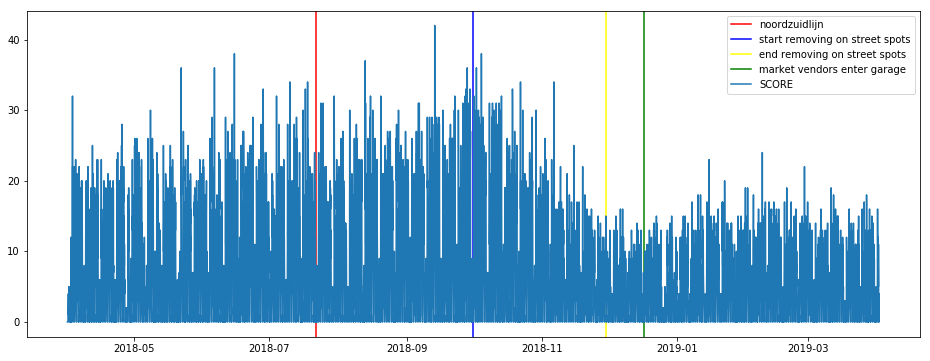

In [260]:
figure(figsize=(16,6))
x8 = aggs_npr.index;
y8 = aggs_npr.SCORE


plt.axvline(dt.datetime(2018, 7, 22),label='noordzuidlijn',color='red')
plt.axvline(dt.datetime(2018, 10, 1),label='start removing on street spots',color='blue')
plt.axvline(dt.datetime(2018, 11, 30),label='end removing on street spots',color='yellow')
plt.axvline(dt.datetime(2018, 12, 17),label='market vendors enter garage',color='green')

plt.plot(x8, y8)
plt.legend()

## 

## Albert Cuyp Parking Garage data
Visitors, Permitholders, and Subscriptions

In [212]:
filename = 'milou_AC.xlsx'
folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/'

path = folder + filename
raw_garagedata = pd.read_excel(path,sheet_name='ParkingTransaction')

raw_garagedata['Entry_DT_UTC'] = pd.to_datetime(raw_garagedata['Entry_DT_UTC'])
raw_garagedata['Exit_DT_UTC'] = pd.to_datetime(raw_garagedata['Exit_DT_UTC'])

In [516]:
oct_scenario = ['oct','2018-09-01','2018-09-30']
feb_scenario = ['feb','2019-02-01','2019-02-28']
def get_occupancy_offstreet_real(df,scenario):
    month = scenario[0]
    start = scenario[1]
    stop = scenario[2]
    raw_data = df[(df['Entry_DT_UTC'] > start) & (df['Entry_DT_UTC'] < stop)]
    raw_data['PermitHolder'] = np.where(raw_data['SubscriptionModel'] == 'SHPV', 1,0)
    raw_data['Visitor'] = np.where((raw_data['SubscriptionModel'] == 'Passanten') | (raw_data['SubscriptionModel'] == 'Passanten Dip In Uit'), 1,0)
    raw_data_entry = raw_data.set_index(['Entry_DT_UTC'])
    raw_data_exit = raw_data.set_index(['Exit_DT_UTC'])
    
    aggs_raw_permitholders_entry = raw_data_entry.resample('H').apply({'PermitHolder':'sum'})
    aggs_raw_visitors_entry = raw_data_entry.resample('H').apply({'Visitor':'sum'})
    
    aggs_raw_permitholders_exit = raw_data_exit.resample('H').apply({'PermitHolder':'sum'})
    aggs_raw_visitors_exit = raw_data_exit.resample('H').apply({'Visitor':'sum'})
    
    aggs_raw_garage_entry=pd.merge(aggs_raw_visitors_entry, aggs_raw_permitholders_entry, left_index=True, right_index=True)
    aggs_raw_garage_entry['PermitHolder AND Visitor'] = aggs_raw_garage_entry['PermitHolder']+aggs_raw_garage_entry['Visitor']

    aggs_raw_garage_exit=pd.merge(aggs_raw_visitors_exit, aggs_raw_permitholders_entry, left_index=True, right_index=True)
    aggs_raw_garage_exit['PermitHolder AND Visitor'] = aggs_raw_garage_exit['PermitHolder']+aggs_raw_garage_exit['Visitor']

    garage_data_entry = aggs_raw_garage_entry
    garage_data_entry = garage_data_entry.reset_index()
    garage_data_entry['hour']=garage_data_entry['Entry_DT_UTC'].dt.hour
    garage_data_grouped = garage_data_entry.groupby(garage_data_entry.hour).mean()
    entries_cum_garage = garage_data_grouped.cumsum(axis = 0)
    entries_cum_garage = entries_cum_garage[['PermitHolder AND Visitor','PermitHolder','Visitor']]
    entries_cum_garage.columns.values[0]= 'all_entries'
    entries_cum_garage.columns.values[1]= 'permitholder_entries'
    entries_cum_garage.columns.values[2]= 'nonpermitholder_entries'
    
    garage_data_exit = aggs_raw_garage_exit
    garage_data_exit = garage_data_exit.reset_index()
    garage_data_exit['hour']=garage_data_exit['index'].dt.hour
    garage_data_grouped = garage_data_exit.groupby(garage_data_exit.hour).mean()
    exits_cum_garage = garage_data_grouped.cumsum(axis = 0)
    exits_cum_garage = exits_cum_garage[['PermitHolder AND Visitor','PermitHolder','Visitor']]
    exits_cum_garage.columns.values[0]= 'all_exits'
    exits_cum_garage.columns.values[1]= 'permitholder_exits'
    exits_cum_garage.columns.values[2]= 'nonpermitholder_exits'
    
    all_entries_exits = pd.concat([entries_cum_garage,exits_cum_garage],axis=1)
    all_entries_exits['diff'+ '_'+month] = all_entries_exits['all_entries']-all_entries_exits['all_exits']
    
    return all_entries_exits[['diff'+ '_'+month]]
    

In [517]:
occ_offstreet_real_oct = get_occupancy_offstreet_real(raw_garagedata,oct_scenario)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [518]:
occ_offstreet_real_feb = get_occupancy_offstreet_real(raw_garagedata,feb_scenario)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [519]:
occ_offstreet_real_oct.head()

diff_oct
hour          
0     0.000000
1    -0.107143
2    -0.107143
3    -0.107143
4     0.250000

In [521]:
occ_offstreet_real_feb

diff_feb
hour           
0     -0.943020
1     -1.165242
2     -1.294872
3     -1.301994
4     -1.384615
5     -0.883191
6     -0.290598
7      1.635328
8      5.339031
9     10.376068
10    13.820513
11    17.894587
12    19.301994
13    18.450142
14    15.227920
15    11.561254
16    11.709402
17    20.264957
18    25.042735
19    22.042735
20    15.190883
21     8.376068
22     3.042735
23     0.783476

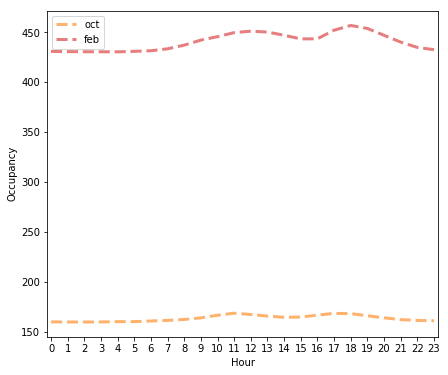

In [556]:
figure(figsize=(7,6))
x1 = occ_offstreet_real_oct.index
x2 = occ_offstreet_real_feb.index
y1 = occ_offstreet_real_oct.diff_oct+160
y2 = occ_offstreet_real_feb.diff_feb+432


plt.plot(x1,y1,'--',alpha=0.6,linewidth=3,label='oct',c='C1')
plt.plot(x2,y2,'--',alpha=0.6,linewidth=3,label='feb',c='C3')

plt.xticks(np.arange(min(x1), max(x1)+1, 1.0))
plt.xticks(np.arange(min(x1), max(x1)+1, 1.0))
plt.margins(x=0.01)
plt.xlabel('Hour')
plt.ylabel('Occupancy')
plt.legend()
plt.savefig('occupancy_offstreet_real.png')


In [215]:
raw_data = raw_garagedata[(raw_garagedata['Entry_DT_UTC'] > '2018-04-01')&(raw_garagedata['Entry_DT_UTC'] < '2019-05-01')]
raw_data['PermitHolder'] = np.where(raw_data['SubscriptionModel'] == 'SHPV', 1,0)
raw_data['Visitor'] = np.where((raw_data['SubscriptionModel'] == 'Passanten') | (raw_data['SubscriptionModel'] == 'Passanten Dip In Uit'), 1,0)
raw_data_entry = raw_data.set_index(['Entry_DT_UTC'])
raw_data_exit = raw_data.set_index(['Exit_DT_UTC'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [216]:
aggs_raw_permitholders_entry = raw_data_entry.resample('H').apply({'PermitHolder':'sum'})
aggs_raw_visitors_entry = raw_data_entry.resample('H').apply({'Visitor':'sum'})

In [217]:
aggs_raw_permitholders_exit = raw_data_exit.resample('H').apply({'PermitHolder':'sum'})
aggs_raw_visitors_exit = raw_data_exit.resample('H').apply({'Visitor':'sum'})

In [227]:
aggs_raw_garage_entry=pd.merge(aggs_raw_visitors_entry, aggs_raw_permitholders_entry, left_index=True, right_index=True)
aggs_raw_garage_entry['PermitHolder AND Visitor'] = aggs_raw_garage_entry['PermitHolder']+aggs_raw_garage_entry['Visitor']
# aggs_raw_garage_entry['ALL'] = aggs_raw_garage_entry['PermitHolder AND Visitor']+aggs_npr['SCORE']
# aggs_raw_garage_entry['ALL VISITORS'] = aggs_raw_garage_entry['Visitor']+aggs_npr['SCORE']


In [228]:
aggs_raw_garage_exit=pd.merge(aggs_raw_visitors_exit, aggs_raw_permitholders_entry, left_index=True, right_index=True)
aggs_raw_garage_exit['PermitHolder AND Visitor'] = aggs_raw_garage_exit['PermitHolder']+aggs_raw_garage_exit['Visitor']
# aggs_raw_garage_exit['ALL'] = aggs_raw_garage_exit['PermitHolder AND Visitor']+aggs_npr['SCORE']
# aggs_raw_garage_exit['ALL VISITORS'] = aggs_raw_garage_exit['Visitor']+aggs_npr['SCORE']


In [248]:
garage_data_entry = aggs_raw_garage_entry
garage_data_entry = garage_data_entry.reset_index()
garage_data_entry['hour']=garage_data_entry['Entry_DT_UTC'].dt.hour
garage_data_grouped = garage_data_entry.groupby(garage_data_entry.hour).mean()
entries_cum_garage = garage_data_grouped.cumsum(axis = 0)
entries_cum_garage = entries_cum_garage[['PermitHolder AND Visitor','PermitHolder','Visitor']]
entries_cum_garage.columns.values[0]= 'all_entries'
entries_cum_garage.columns.values[1]= 'permitholder_entries'
entries_cum_garage.columns.values[2]= 'nonpermitholder_entries'

In [257]:
entries_cum_garage.head()

all_entries  permitholder_entries  nonpermitholder_entries
hour                                                            
0        0.857143              0.794805                 0.062338
1        1.194805              1.114286                 0.080519
2        1.387013              1.275325                 0.111688
3        1.568831              1.366234                 0.202597
4        1.909091              1.519481                 0.389610

In [250]:
garage_data_exit = aggs_raw_garage_exit
garage_data_exit = garage_data_exit.reset_index()
garage_data_exit['hour']=garage_data_exit['index'].dt.hour
garage_data_grouped = garage_data_exit.groupby(garage_data_exit.hour).mean()
exits_cum_garage = garage_data_grouped.cumsum(axis = 0)
exits_cum_garage = exits_cum_garage[['PermitHolder AND Visitor','PermitHolder','Visitor']]
exits_cum_garage.columns.values[0]= 'all_exits'
exits_cum_garage.columns.values[1]= 'permitholder_exits'
exits_cum_garage.columns.values[2]= 'nonpermitholder_exits'

In [258]:
garage_data_grouped.head()

Visitor  PermitHolder  PermitHolder AND Visitor  hour
hour                                                        
0     0.382812      0.796875                  1.179688   0.0
1     0.151042      0.320312                  0.471354   1.0
2     0.072917      0.161458                  0.234375   2.0
3     0.044271      0.091146                  0.135417   3.0
4     0.049479      0.153646                  0.203125   4.0

In [254]:
all_entries_exits = pd.concat([entries_cum_garage,exits_cum_garage],axis=1)


In [496]:
all_entries_exits['diff'] = all_entries_exits['all_entries']-all_entries_exits['all_exits']

In [497]:
all_entries_exits

all_entries  permitholder_entries  nonpermitholder_entries   all_exits  \
hour                                                                           
0        0.857143              0.794805                 0.062338    1.179688   
1        1.194805              1.114286                 0.080519    1.651042   
2        1.387013              1.275325                 0.111688    1.885417   
3        1.568831              1.366234                 0.202597    2.020833   
4        1.909091              1.519481                 0.389610    2.223958   
5        3.293506              2.454545                 0.838961    3.335938   
6        6.070130              4.267532                 1.802597    5.481771   
7       10.893506              7.168831                 3.724675    9.010417   
8       18.963636             11.651948                 7.311688   14.403646   
9       29.841558             17.696104                12.145455   22.419271   
10      41.942857             24.085714                17.857143   32.117188   
11      54.745966             30.735973                24.009993   42.989583   
12      67.523168             38.096077                29.427091   55.610363   
13      80.401406             46.500222                33.901184   69.789583   
14      95.204515             57.546854                37.657661   86.527246   
15     113.209697             71.873279                41.336417  105.883090   
16     135.704515             89.334419                46.370096  127.425947   
17     159.300370            105.919911                53.380459  147.301272   
18     175.533531            116.824056                58.709474  161.825947   
19     185.624204            124.702295                60.921910  174.064908   
20     193.489489            131.546854                61.942635  185.701272   
21     199.758919            137.280015                62.478905  195.867505   
22     203.738194            140.982087                62.756107  202.418155   
23     205.857365            142.956181                62.901184  205.522051   

      permitholder_exits  nonpermitholder_exits       diff  
hour                                                        
0               0.796875               0.382812  -0.322545  
1               1.117188               0.533854  -0.456236  
2               1.278646               0.606771  -0.498404  
3               1.369792               0.651042  -0.452002  
4               1.523437               0.700521  -0.314867  
5               2.460938               0.875000  -0.042431  
6               4.278646               1.203125   0.588359  
7               7.187500               1.822917   1.883090  
8              11.682292               2.721354   4.559991  
9              17.742188               4.677083   7.422288  
10             24.148438               7.968750   9.825670  
11             30.833333              12.156250  11.756383  
12             38.212554              17.397808  11.912805  
13             46.638528              23.151055  10.611823  
14             57.713853              28.813393   8.677270  
15             72.077489              33.805601   7.326607  
16             89.583983              37.841964   8.278568  
17            106.212554              41.088718  11.999098  
18            117.145022              44.680925  13.707584  
19            125.043723              49.021185  11.559296  
20            131.906061              53.795211   7.788218  
21            137.654113              58.213393   3.891414  
22            141.365801              61.052354   1.320039  
23            143.345022              62.177029   0.335314

In [ ]:
figure(figsize=(7,6))
x = all_entries_exits.index[:24]
y1 = all_entries_exits.may[:24]
y2 = all_entries_exits.oct[:24]
y3 = all_entries_exits.feb[:24]

plt.plot(x,y1,alpha=0.6,linewidth=3)
plt.plot(x,y2,alpha=0.6,linewidth=3)
plt.plot(x,y3,alpha=0.6,linewidth=3,c='C3')

# plt.xticks(np.arange(min(x), max(x), 1.0))
plt.margins(x=0.01)
plt.xlabel('Hour')
plt.ylabel('Occupancy')
plt.savefig('occupancy_NPR_real.png')
plt.legend()

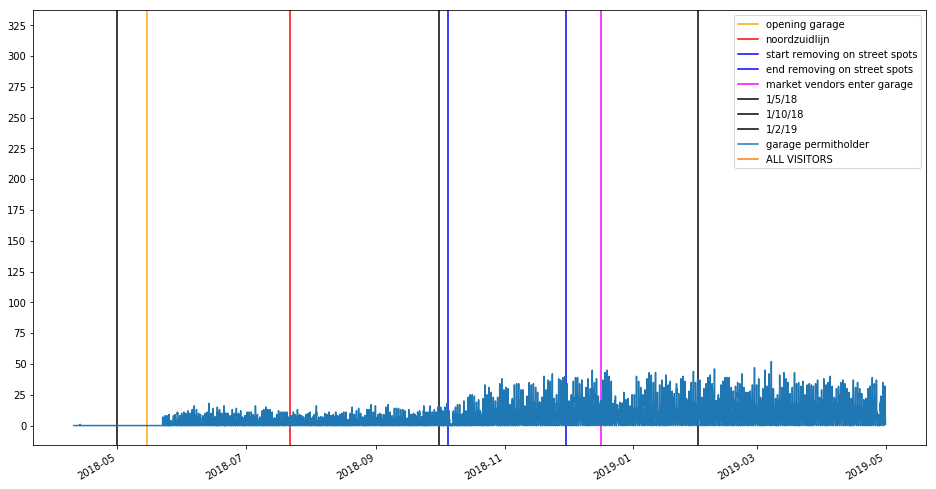

In [532]:
figure(figsize=(16,8))
x = aggs_raw2.index;
y = aggs_raw2['PermitHolder']
x1 = aggs_raw2.index;
y1 = aggs_raw2['Visitor']
x2 = aggs_raw2.index;
y2 = aggs_raw2['PermitHolder AND Visitor']
x3 = aggs_npr.index;
y3 = aggs_npr.SCORE
x4 = aggs_raw2.index;
y4 = aggs_raw2['ALL']
x5 = aggs_raw2.index;
y5 = aggs_raw2['ALL VISITORS']
plt.xticks(rotation=30, horizontalalignment='right')
plt.yticks(np.arange(0,1000,step=25))
plt.axvline(dt.datetime(2018, 5, 15),label='opening garage',color='orange')
plt.axvline(dt.datetime(2018, 7, 22),label='noordzuidlijn',color='red')
plt.axvline(dt.datetime(2018, 10, 5),label='start removing on street spots',color='blue')
plt.axvline(dt.datetime(2018, 11, 30),label='end removing on street spots',color='blue')
plt.axvline(dt.datetime(2018, 12, 17),label='market vendors enter garage',color='magenta')

plt.axvline(dt.datetime(2018, 5, 1),label='1/5/18',color='black')
plt.axvline(dt.datetime(2018, 10, 1),label='1/10/18',color='black')
plt.axvline(dt.datetime(2019, 2, 1),label='1/2/19',color='black')

plt.plot(x, y,label='garage permitholder')
# plt.plot(x1, y1,label='garage visitor')
# plt.plot(x2, y2,label='garage permitholder AND visitor')
# plt.plot(x3, y3,label='npr visitor')
# plt.plot(x4, y4,label='all')
plt.plot(x5, y5,label='ALL VISITORS')
plt.legend()

In [134]:
all_visitors = aggs_raw2[['ALL VISITORS']]
npr = aggs_npr[['SCORE']]
x = aggs_raw2.index;
permitholders = aggs_raw2['PermitHolder']
all_parkings = aggs_raw2['ALL']


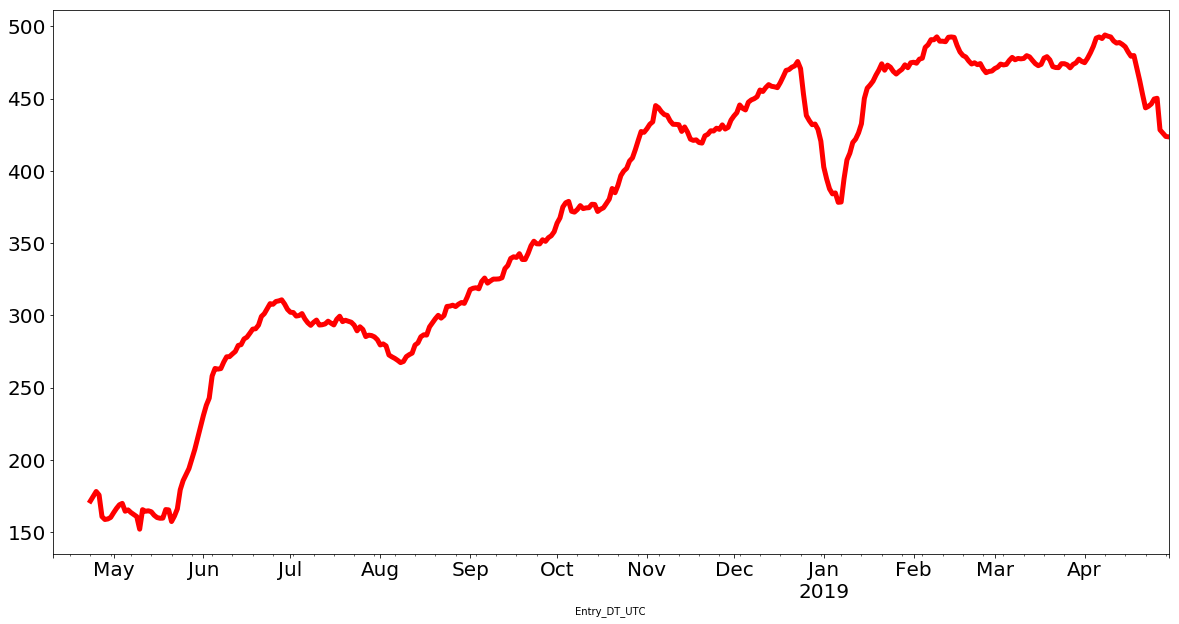

In [135]:
all_parkings.rolling(14).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red')

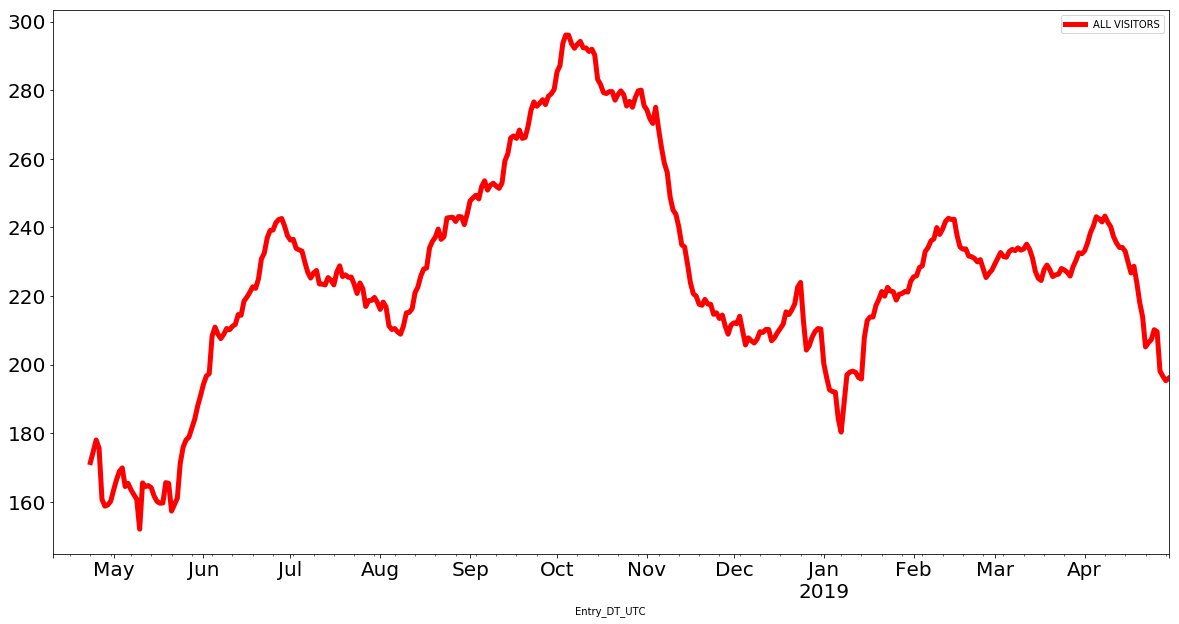

In [136]:
all_visitors.rolling(14).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red')

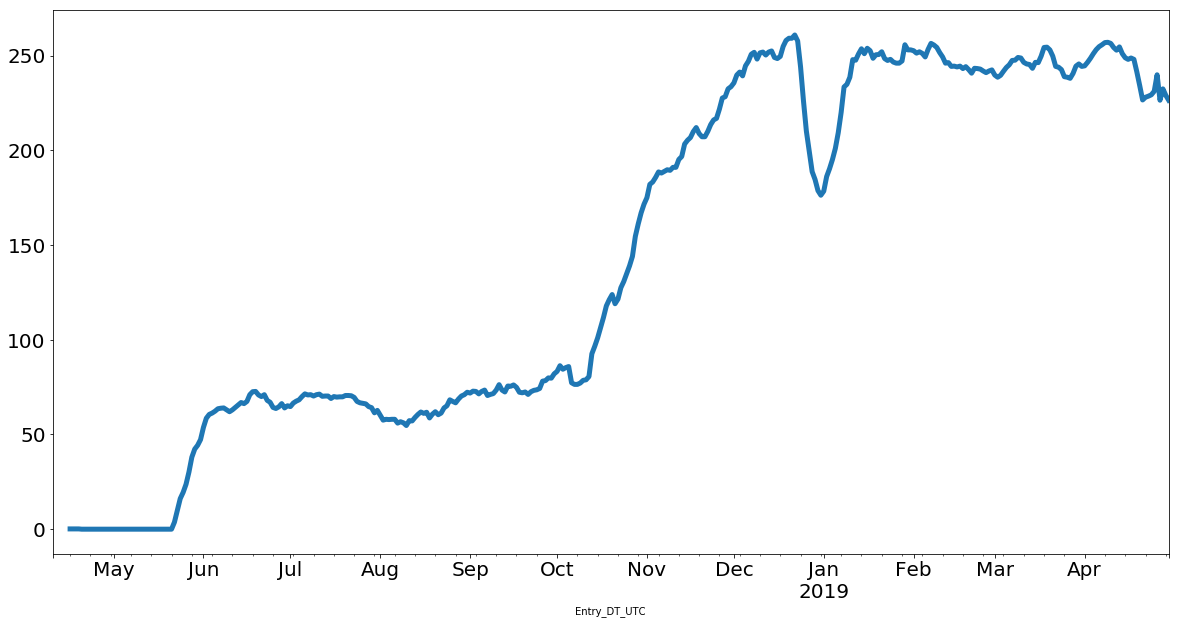

In [137]:
permitholders.rolling(7).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)

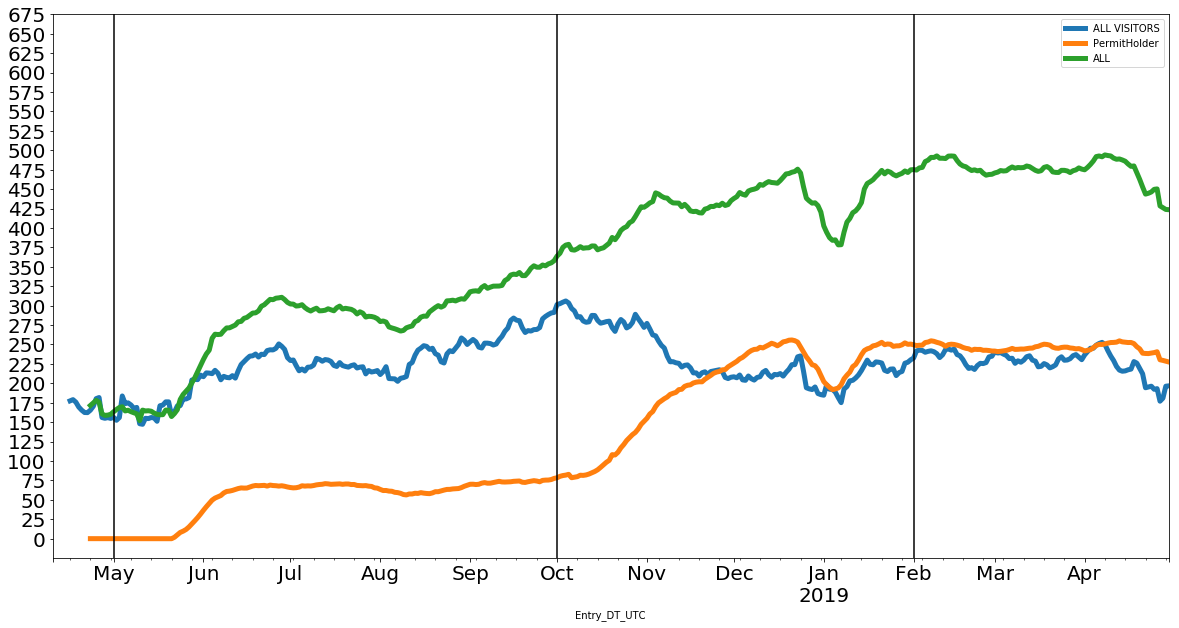

In [138]:
combi = pd.concat([all_visitors.rolling(7).mean(), permitholders.rolling(14).mean(), all_parkings.rolling(14).mean()], axis=1)
combi.plot(figsize=(20,10), linewidth=5, fontsize=20,yticks =(np.arange(0,700,step=25)))
plt.axvline(dt.datetime(2018, 5, 1),label='1/5/18',color='black')
plt.axvline(dt.datetime(2018, 10, 1),label='1/10/18',color='black')
plt.axvline(dt.datetime(2019, 2, 1),label='1/2/19',color='black')

In [139]:
filename = 'milou_AC.xlsx'
folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/'
path = folder + filename
garagedata = pd.read_excel(path)

In [140]:
garagedata['Date'] = pd.to_datetime(garagedata['Date'])
garagedata['SCORE']=1
data = garagedata[(garagedata['Date'] > '2018-05-16')&(garagedata['Date'] < '2019-02-01')]
data = data.set_index(['Date'])
aggs_permit = data.resample('D').apply({'CustomCounter':'mean'})
aggs_visitor = data.resample('D').apply({'TransientCounter':'mean'})

In [141]:
aggs_visitor

TransientCounter
Date                        
2018-05-17         15.166667
2018-05-18        119.000000
2018-05-19        119.625000
2018-05-20        120.000000
2018-05-21        120.000000
2018-05-22         51.041667
2018-05-23          3.708333
2018-05-24          2.166667
2018-05-25          6.333333
2018-05-26         12.333333
2018-05-27          4.916667
2018-05-28          8.166667
2018-05-29          6.666667
2018-05-30          7.083333
2018-05-31          5.916667
2018-06-01          2.666667
2018-06-02          5.875000
2018-06-03          4.583333
2018-06-04          1.708333
2018-06-05          0.500000
2018-06-06          1.208333
2018-06-07          1.583333
2018-06-08          2.458333
2018-06-09          4.875000
2018-06-10          4.375000
2018-06-11          4.583333
2018-06-12          0.875000
2018-06-13          4.791667
2018-06-14          3.250000
2018-06-15          5.833333
...                      ...
2019-01-02          7.458333
2019-01-03          9.000000
2019-01-04         15.500000
2019-01-05         17.583333
2019-01-06          7.291667
2019-01-07          5.291667
2019-01-08          4.958333
2019-01-09          9.000000
2019-01-10         13.083333
2019-01-11         14.250000
2019-01-12         15.875000
2019-01-13          9.500000
2019-01-14          7.541667
2019-01-15         10.416667
2019-01-16          9.750000
2019-01-17          9.375000
2019-01-18         11.833333
2019-01-19         16.916667
2019-01-20          6.250000
2019-01-21          4.833333
2019-01-22          7.541667
2019-01-23          8.916667
2019-01-24          8.416667
2019-01-25         12.083333
2019-01-26         13.000000
2019-01-27          4.333333
2019-01-28          7.000000
2019-01-29         10.625000
2019-01-30         12.666667
2019-01-31         15.208333

[260 rows x 1 columns]

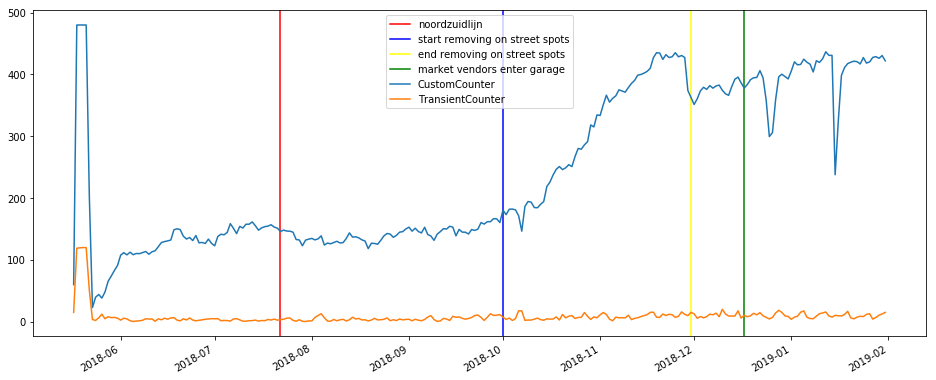

In [143]:
figure(figsize=(16,6))
x = aggs_permit.index;
y = aggs_permit.CustomCounter
y2 = aggs_visitor.TransientCounter
plt.xticks(rotation=30, horizontalalignment='right')
plt.axvline(dt.datetime(2018, 7, 22),label='noordzuidlijn',color='red')
plt.axvline(dt.datetime(2018, 10, 1),label='start removing on street spots',color='blue')
plt.axvline(dt.datetime(2018, 11, 30),label='end removing on street spots',color='yellow')
plt.axvline(dt.datetime(2018, 12, 17),label='market vendors enter garage',color='green')
plt.plot(x, y)
plt.plot(x, y2)
plt.legend()

# Similar neighborhoods

## Kerncijfers Wijken en Buurten (KWB data)

In [28]:
filename = 'kwb-2018.xls'
folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/neighborhood/'
path = folder + filename
buurtdata = pd.read_excel(path)

In [29]:
amsdata = buurtdata[buurtdata['gm_naam'] == 'Amsterdam']
amsdata = amsdata[amsdata['recs'] == 'Buurt']



In [30]:
amsdata.head()

gwb_code_10  gwb_code_8            regio    gm_naam   recs    gwb_code  \
5158  BU03630000     3630000      Kop Zeedijk  Amsterdam  Buurt  BU03630000   
5159  BU03630001     3630001   Oude Kerk e.o.  Amsterdam  Buurt  BU03630001   
5160  BU03630002     3630002  Burgwallen Oost  Amsterdam  Buurt  BU03630002   
5161  BU03630003     3630003         Nes e.o.  Amsterdam  Buurt  BU03630003   
5162  BU03630004     3630004  BG-terrein e.o.  Amsterdam  Buurt  BU03630004   

     ind_wbi  a_inw  a_man  a_vrouw  a_00_14  a_15_24  a_25_44  a_45_64  \
5158       1   1030    605      425       50      130      540      250   
5159       1    690    390      295       25      115      365      135   
5160       1   1590    860      730      105      250      760      320   
5161       1    360    185      175       20       70      190       65   
5162       1    630    345      280       40       95      275      160   

      a_65_oo  a_ongeh  a_gehuwd  a_gesch  a_verwed  a_w_all  a_nw_all  \
5158       70      800       155       70        15      330       170   
5159       60      550        85       50        15      230       105   
5160      160     1210       255      110        20      515       265   
5161       25      285        55       20         5      125        35   
5162       70      465       125       40        10      160       100   

      a_marok  a_antaru  a_suri  a_tur  a_ov_nw a_geb p_geb a_ste p_ste  a_hh  \
5158        5        10      25     10      120     .     .     .     .   750   
5159        5        10      10     10       75     .     .     .     .   505   
5160       20        20      30     10      190     .     .     .     .  1125   
5161        0         0       5      5       25     .     .     .     .   260   
5162       10         5      15      5       65     .     .     .     .   445   

      a_1p_hh  a_hh_z_k  a_hh_m_k g_hhgro bev_dich  a_woning g_woz p_1gezw  \
5158      530       175        45     1,4    16999       742   361       4   
5159      355       110        35     1,4     7819       486   374       6   
5160      790       230       100     1,4    25530       994   390       4   
5161      185        60        10     1,4     6752       261   501       9   
5162      320        75        45     1,4     7464       398   475       7   

     p_mgezw p_bewndw p_leegsw p_koopw p_huurw p_wcorpw p_ov_hw p_e_o_w  \
5158      96       82       18      20      78        7      71       2   
5159      94       77       23      12      83       29      53       6   
5160      96       83       17      18      79        8      72       3   
5161      91       68       32      29      65        5      59       7   
5162      93       84       16      19      80       37      43       2   

     p_bjj2k p_bjo2k g_ele g_ele_ap g_ele_tw g_ele_hw g_ele_2w g_ele_vw  \
5158      97       3     .        .        .        .        .        .   
5159      86      14     .        .        .        .        .        .   
5160      96       4     .        .        .        .        .        .   
5161      98       2     .        .        .        .        .        .   
5162     100       0     .        .        .        .        .        .   

     g_ele_hu g_ele_ko g_gas g_gas_ap g_gas_tw g_gas_hw g_gas_2w g_gas_vw  \
5158        .        .     .        .        .        .        .        .   
5159        .        .     .        .        .        .        .        .   
5160        .        .     .        .        .        .        .        .   
5161        .        .     .        .        .        .        .        .   
5162        .        .     .        .        .        .        .        .   

     g_gas_hu g_gas_ko p_stadsv a_inkont g_ink_po g_ink_pi p_ink_li p_ink_hi  \
5158        .        .        .        .        .        .        .        .   
5159        .        .        .        .        .        .        .        .   
5160        .        .        .        .        .        .        .      

In [31]:
len(amsdata)

479

In [32]:
df_buurtcodecbs_buurtnaam = amsdata[['gwb_code_8','regio']]


In [33]:
buurt_buurtcode=amsdata[['gwb_code_8','regio']]
buurt_buurtcode = buurt_buurtcode.set_index(['gwb_code_8'])

In [34]:
buurt_buurtcode.head()

regio
gwb_code_8                 
3630000         Kop Zeedijk
3630001      Oude Kerk e.o.
3630002     Burgwallen Oost
3630003            Nes e.o.
3630004     BG-terrein e.o.

In [35]:
bevolking = ['a_inw','a_man','a_vrouw','a_00_14','a_15_24','a_25_44','a_45_64','a_65_oo','a_ongeh','a_gehuwd','a_hh','a_1p_hh','a_hh_z_k','a_hh_m_k','g_hhgro','bev_dich']
wonen = ['a_woning','g_woz','p_1gezw','p_mgezw','p_koopw','p_huurw','p_leegsw','p_bewndw']
bedrijfsvestigingen = ['a_bedv','a_bed_a','a_bed_bf','a_bed_gi','a_bed_hj','a_bed_kl','a_bed_mn','a_bed_ru']
motorvoertuigen = ['a_pau','g_pau_hh','g_pau_km']
voorzieningen = ['g_afs_hp','g_afs_gs','g_afs_kv','g_afs_sc','g_3km_sc']
oppervlakte = ['a_opp_ha','a_lan_ha','a_wat_ha']
stedelijkheid = ['ste_mvs','ste_oad']

In [36]:
pd.set_option('display.max_columns', 500)

In [37]:
amsdata_select=amsdata[['gwb_code_8']+bevolking+bedrijfsvestigingen+motorvoertuigen+oppervlakte+stedelijkheid]

In [38]:
amsdata_select = amsdata_select.apply(pd.to_numeric,errors='coerce',downcast='integer')

In [39]:
amsdata_select = amsdata_select.set_index(['gwb_code_8'])

In [40]:
amsdata_select = amsdata_select.dropna(axis='columns')

In [41]:
franshalsbuurt = pd.DataFrame(amsdata_select.loc[amsdata_select.index == 3632402])

In [42]:
ary = scipy.spatial.distance.cdist(amsdata_select, franshalsbuurt, metric='euclidean')
amsdata_select[ary==ary.min()]

a_inw  a_man  a_vrouw  a_00_14  a_15_24  a_25_44  a_45_64  \
gwb_code_8                                                              
3632402      2615   1300     1315      240      270     1330      560   

            a_65_oo  a_ongeh  a_gehuwd  a_hh  a_1p_hh  a_hh_z_k  a_hh_m_k  \
gwb_code_8                                                                  
3632402         220     1985       425  1735     1135       385       225   

            a_pau  a_opp_ha  a_lan_ha  a_wat_ha  
gwb_code_8                                       
3632402       535        12        11         1

In [43]:
amsdata_select['eucledian_distance']=scipy.spatial.distance.cdist(amsdata_select, franshalsbuurt, metric='euclidean')

In [44]:
amsdata_select.sort_values(by=['eucledian_distance']).head()


a_inw  a_man  a_vrouw  a_00_14  a_15_24  a_25_44  a_45_64  \
gwb_code_8                                                              
3632402      2615   1300     1315      240      270     1330      560   
3632403      2580   1305     1275      215      335     1275      540   
3632400      2570   1310     1260      315      315     1160      585   
3635401      2750   1305     1445      290      350     1220      580   
3632500      2515   1180     1330      180      295     1115      530   

            a_65_oo  a_ongeh  a_gehuwd  a_hh  a_1p_hh  a_hh_z_k  a_hh_m_k  \
gwb_code_8                                                                  
3632402         220     1985       425  1735     1135       385       225   
3632403         225     2005       390  1760     1210       355       205   
3632400         205     1915       495  1605      990       355       275   
3635401         315     1985       475  1710     1015       415       290   
3632500         405     1765       435  1735     1195       360       195   

            a_pau  a_opp_ha  a_lan_ha  a_wat_ha  eucledian_distance  
gwb_code_8                                                           
3632402       535        12        11         1            0.000000  
3632403       425         8         8         0          180.141611  
3632400       610        14        12         2          315.128545  
3635401       740        23        19         4          361.170320  
3632500       455        12        11         2          412.584537

In [45]:
df_merged = buurt_buurtcode.merge(amsdata_select, how='outer', left_index=True, right_index=True)

In [46]:
df_merged.sort_values(by=['eucledian_distance']).head()

regio  a_inw  a_man  a_vrouw  a_00_14  a_15_24  \
gwb_code_8                                                                   
3632402           Frans Halsbuurt   2615   1300     1315      240      270   
3632403     Hercules Seghersbuurt   2580   1305     1275      215      335   
3632400               Hemonybuurt   2570   1310     1260      315      315   
3635401            Rijnbuurt Oost   2750   1305     1445      290      350   
3632500         Willibrordusbuurt   2515   1180     1330      180      295   

            a_25_44  a_45_64  a_65_oo  a_ongeh  a_gehuwd  a_hh  a_1p_hh  \
gwb_code_8                                                                
3632402        1330      560      220     1985       425  1735     1135   
3632403        1275      540      225     2005       390  1760     1210   
3632400        1160      585      205     1915       495  1605      990   
3635401        1220      580      315     1985       475  1710     1015   
3632500        1115      530      405     1765       435  1735     1195   

            a_hh_z_k  a_hh_m_k  a_pau  a_opp_ha  a_lan_ha  a_wat_ha  \
gwb_code_8                                                            
3632402          385       225    535        12        11         1   
3632403          355       205    425         8         8         0   
3632400          355       275    610        14        12         2   
3635401          415       290    740        23        19         4   
3632500          360       195    455        12        11         2   

            eucledian_distance  
gwb_code_8                      
3632402               0.000000  
3632403             180.141611  
3632400             315.128545  
3635401             361.170320  
3632500             412.584537

In [47]:
df_merged = df_merged.rename(index=str, columns={"regio": "buurt"})

## NPR cluster data

In [48]:
filename = 'npr_occupation_clusters_latest.csv'
folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/clustering/'
path = folder + filename
npr_clusters = pd.read_csv(path)

In [49]:
# npr_clusters = npr_clusters.drop("Unnamed: 0", axis=1)
npr_clusters = npr_clusters.sort_values(by=['cluster'])
npr_clusters

buurtcode  cluster
0        a00a        0
191      k47e        0
69       e12b        0
68       e12a        0
67       b10a        0
204      k49b        0
206      k49d        0
207      k49e        0
208      k49f        0
221      k59a        0
190      k47d        0
222      k90a        0
224      k90d        0
225      k90e        0
57       a08d        0
56       a08b        0
55       a08a        0
226      k90i        0
52       a07f        0
51       a07e        0
227      k90j        0
223      k90c        0
187      k47a        0
186      k46c        0
184      k46a        0
106      e37a        0
105      e36b        0
104      e36a        0
124      e41d        0
135      f11f        0
..        ...      ...
209      k52a        2
210      k52b        2
200      k48d        2
109      e37e        2
72       e13c        2
185      k46b        2
78       e14a        2
164      k24a        2
165      k24b        2
166      k24c        2
167      k24d        2
168      k24e        2
169      k25a        2
170      k25b        2
171      k25c        2
172      k25d        2
73       e13d        2
173      k26a        2
175      k26c        2
176      k44a        2
177      k44b        2
178      k44c        2
179      k44d        2
180      k44e        2
76       e13g        2
182      k45a        2
75       e13f        2
74       e13e        2
174      k26b        2
212      k52d        2

[316 rows x 2 columns]

In [50]:
# capitalize to merge with other file using buurtcode starting with a capital
npr_clusters['buurtcode']=npr_clusters['buurtcode'].str.capitalize()

In [51]:
cluster_num_frans_halsbuurt = npr_clusters.loc[npr_clusters['buurtcode'] == 'K24c','cluster'].item()

In [52]:
filename = '2018_buurten_ois_kerncijfers.xlsx'
folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/neighborhood/'
path = folder + filename
buurten_kerncijfers = pd.read_excel(path,header=2)

In [53]:
buurten_kerncijfers.head()

buurt oppervlakte in ha oppervlakte in ha land bevolking  \
0                   NaN               NaN                    NaN       NaN   
1      A00a Kop Zeedijk            8,0440                 5.9833      1032   
2   A00b Oude Kerk e.o.            9.2593                 8.8691       689   
3  A00c Burgwallen Oost            7.2486                 6.2334      1589   
4         A00d Nes e.o.            5.7761                 5.3952       361   

  bevolkingsdichtheid per km2 land woningen woningdichtheid per km2 land  \
0                              NaN      NaN                          NaN   
1                            17248      742                        12401   
2                             7769      485                         5468   
3                            25492      994                        15946   
4                             6691      261                         4838   

  gemiddelde woningbezetting  
0                        NaN  
1                       1.39  
2                       1.42  
3                       1,60  
4                       1.38

In [54]:
# dropping null value columns to avoid errors 
buurten_kerncijfers.dropna(inplace = True) 
buurten_kerncijfers["buurtcode"] = buurten_kerncijfers['buurt'].str[0:4]
buurten_kerncijfers["buurt"] = buurten_kerncijfers['buurt'].str[5:]

In [55]:
npr_clusters = npr_clusters.merge(buurten_kerncijfers, left_on='buurtcode',right_on='buurtcode')

npr_cluster_2 = npr_clusters['cluster'] == cluster_num_frans_halsbuurt
# npr_cluster_2 = npr_clusters['cluster'] == 2

npr_cluster_2 = npr_clusters[npr_cluster_2]
npr_cluster_2 = npr_cluster_2.sort_values('buurtcode')

# npr_cluster_2 = npr_clusters[npr_cluster_2]
# npr_cluster_2 = npr_cluster_2.sort_values('buurtcode')

# npr_cluster_0_2 = pd.concat([npr_cluster_0, npr_cluster_2])

In [56]:
npr_cluster_2

buurtcode  cluster                             buurt oppervlakte in ha  \
184      A00c        2                   Burgwallen Oost            7.2486   
183      A00d        2                          Nes e.o.            5.7761   
181      A00e        2                   BG-terrein e.o.           10,1390   
180      A01b        2                         Hemelrijk            6.2942   
179      A01d        2                  Spuistraat Noord            5.6778   
178      A01e        2                  Nieuwe Kerk e.o.            8,4210   
177      A01f        2                   Spuistraat Zuid            6.7152   
176      A01g        2                    Begijnhofbuurt            7.0622   
175      A02c        2                Felix Meritisbuurt           20.3112   
185      A02d        2                Leidsegracht Noord            6.9061   
174      A03a        2                      Spiegelbuurt            9.4255   
172      A03b        2                      Gouden Bocht            5.5532   
171      A03c        2                     Van Loonbuurt           15.3352   
170      A03d        2                   Amstelveldbuurt           14,7860   
169      A03e        2               Rembrandtpleinbuurt            7.6807   
168      A03f        2                    Reguliersbuurt            4.5496   
167      A03g        2                 Leidsegracht Zuid            6.8641   
166      A04b        2              Scheepvaarthuisbuurt           10.7906   
165      A04d        2                           Lastage            7.7727   
205      A04e        2                        Nieuwmarkt            7,1190   
198      A04f        2                         Uilenburg           10.6896   
197      A04h        2                   Zuiderkerkbuurt            9.1025   
196      A04i        2                Waterloopleinbuurt           12.9563   
195      A05a        2                  Westerdokseiland           33.7834   
194      A05b        2              Haarlemmerbuurt Oost           10.1251   
193      A05c        2              Haarlemmerbuurt West           11.7314   
192      A05d        2               Westelijke Eilanden           21.6518   
191      A05f        2               Planciusbuurt Noord            2,4170   
190      A05g        2                Planciusbuurt Zuid            1.7356   
189      A06a        2                     Driehoekbuurt           10.6088   
..        ...      ...                               ...               ...   
122      M32a        2  Noordoostkwadrant Indische Buurt           26.6985   
124      M32b        2   Zuidoostkwadrant Indische Buurt           14.0405   
134      M32c        2                Zeeburgerdijk Oost           12.6938   
135      M32d        2                         Flevopark           76.0023   
126      M33b        2                        Rietlanden           34.4096   
127      M33c        2                       Java-eiland           71.3294   
128      M33d        2                       KNSM-eiland           103.479   
129      M33e        2                        Sporenburg           36.4393   
130      M33f        2                            Borneo           26.7324   
131      M33g        2                Entrepot-Noordwest           12,7340   
132      M33h        2                  Architectenbuurt           14.2169   
113      M33j        2       Bedrijvengebied Cruquiusweg           31,0470   
200      M55c        2                       Julianapark           19.2062   
211      M55d        2                         Don Bosco           16.2478   
201      M55e        2                       Frankendael           29.0357   
202      M55f        2            Tuindorp Amstelstation           11.0046   
203      M55g        2                       De Wetbuurt           28.7602   
204      M55h        2              Tuindorp Frankendael           36.0599   
206      M56a        2                 Linnaeusparkbuurt           17,8300   
207      M56b        2    

In [57]:
path = '/Users/miloubisseling/Documents/UvA/DataScience/Thesis/2018-cbs-pc6huisnr20180801_buurt/pc6hnr20180801_gwb-vs2.csv'
df_buurt_pc = pd.read_csv(path,delimiter=';')

In [58]:
df_buurt_pc['PC4'] = df_buurt_pc['PC6'].str.slice(0, 4, 1) 

In [59]:
df_buurt_pc4 = df_buurt_pc[['PC4','Buurt2018']]

In [60]:
df_buurt_pc4.head()

PC4  Buurt2018
0  1011    3630400
1  1011    3630400
2  1011    3630400
3  1011    3630400
4  1011    3630400

In [61]:
df_buurt_pc4 = df_buurt_pc4.rename(index=str, columns={"Buurt2018": "buurtcode"})
df_buurtcodecbs_buurtnaam = df_buurtcodecbs_buurtnaam.rename(index=str, columns={"gwb_code_8": "buurtcode"})

In [62]:
df_buurt_pc4 = df_buurt_pc4.drop_duplicates(subset='buurtcode')

In [63]:
df_buurtcodecbs_buurtcodeams = pd.merge(df_buurtcodecbs_buurtnaam,df_buurt_pc4,how='inner',left_on='buurtcode',right_on='buurtcode')

In [64]:
df_buurtcodecbs_buurtcodeams

buurtcode                      regio   PC4
0      3630000                Kop Zeedijk  1012
1      3630001             Oude Kerk e.o.  1012
2      3630002            Burgwallen Oost  1012
3      3630003                   Nes e.o.  1012
4      3630004            BG-terrein e.o.  1012
5      3630100         Stationsplein e.o.  1012
6      3630101                  Hemelrijk  1012
7      3630102          Nieuwendijk Noord  1012
8      3630103           Spuistraat Noord  1012
9      3630104           Nieuwe Kerk e.o.  1012
10     3630105            Spuistraat Zuid  1012
11     3630106             Begijnhofbuurt  1012
12     3630107             Kalverdriehoek  1012
13     3630200           Langestraat e.o.  1015
14     3630201           Leliegracht e.o.  1015
15     3630202         Felix Meritisbuurt  1016
16     3630203         Leidsegracht Noord  1016
17     3630300               Spiegelbuurt  1017
18     3630301               Gouden Bocht  1017
19     3630302              Van Loonbuurt  1017
20     3630303            Amstelveldbuurt  1017
21     3630304        Rembrandtpleinbuurt  1017
22     3630305             Reguliersbuurt  1017
23     3630306          Leidsegracht Zuid  1017
24     3630400           Oosterdokseiland  1011
25     3630401       Scheepvaarthuisbuurt  1011
26     3630402                  Rapenburg  1011
27     3630403                    Lastage  1011
28     3630404                 Nieuwmarkt  1011
29     3630405                  Uilenburg  1011
..         ...                        ...   ...
446    3639400                    E-buurt  1103
447    3639401               G-buurt West  1103
448    3639402        Bijlmermuseum Noord  1103
449    3639403                  Kortvoort  1104
450    3639404                  Kelbergen  1104
451    3639405             K-buurt Midden  1104
452    3639406           K-buurt Zuidoost  1104
453    3639407           K-buurt Zuidwest  1104
454    3639408        Grunder/Koningshoef  1103
455    3639409               G-buurt Oost  1103
456    3639410                 Kantershof  1103
457    3639411                 Gooisekant  1104
458    3639412              G-buurt Noord  1103
459    3639413         Bijlmermuseum Zuid  1104
460    3639500                    L-buurt  1106
461    3639501                Gaasperpark  1108
462    3639502                Gaasperplas  1108
463    3639600           Holendrecht West  1106
464    3639601           Reigersbos Noord  1106
465    3639602           Holendrecht Oost  1106
466    3639603           Gaasperdam Noord  1106
467    3639604            Gaasperdam Zuid  1107
468    3639605          Reigersbos Midden  1107
469    3639606            Reigersbos Zuid  1107
470    3639700             Gein Noordwest  1106
471    3639701              Gein Zuidwest  1107
472    3639702             Gein Noordoost  1106
473    3639703              Gein Zuidoost  1107
474    3639800              Dorp Driemond  1109
475    3639801  Landelijk gebied Driemond  1109

[476 rows x 3 columns]

In [65]:
df_buurtcodecbs_buurtcodeams = df_buurtcodecbs_buurtcodeams.rename(index=str, columns={"regio": "buurt"})

In [66]:
df_buurtcodecbs_buurtcodeams = pd.merge(df_buurtcodecbs_buurtcodeams,npr_cluster_2,how='inner',left_on='buurt',right_on='buurt')

In [67]:
df_buurtcodecbs_buurtcodeams = df_buurtcodecbs_buurtcodeams.sort_values(['PC4','buurtcode_y'])

In [68]:
cluster2_pcs = df_buurtcodecbs_buurtcodeams['PC4'].unique()
cluster2_pcs = list(cluster2_pcs)
len(cluster2_pcs)

34

In [69]:
buurtcode_list = df_buurtcodecbs_buurtcodeams['buurtcode_x'].to_list()

In [70]:
buurtcode_list

[3630401,
 3630403,
 3630404,
 3630405,
 3630407,
 3630408,
 3630908,
 3630002,
 3630003,
 3630004,
 3630101,
 3630103,
 3630104,
 3630105,
 3630106,
 3630500,
 3630501,
 3630502,
 3630505,
 3630506,
 3631300,
 3631301,
 3631302,
 3631303,
 3631304,
 3631305,
 3631306,
 3630600,
 3630603,
 3630610,
 3630611,
 3630202,
 3630203,
 3630605,
 3630606,
 3630607,
 3630608,
 3630609,
 3630300,
 3630301,
 3630302,
 3630303,
 3630304,
 3630305,
 3630306,
 3630700,
 3630701,
 3630702,
 3630703,
 3630706,
 3630804,
 3630900,
 3630901,
 3630902,
 3630903,
 3630904,
 3630905,
 3630907,
 3633301,
 3633302,
 3633303,
 3633304,
 3633305,
 3633306,
 3633307,
 3633309,
 3637107,
 3631402,
 3631403,
 3631404,
 3631405,
 3631500,
 3631501,
 3631502,
 3631503,
 3631400,
 3631401,
 3631600,
 3631601,
 3631602,
 3631700,
 3631800,
 3631801,
 3631900,
 3631901,
 3631902,
 3632000,
 3632001,
 3632002,
 3632100,
 3632101,
 3632200,
 3632201,
 3633702,
 3633703,
 3633704,
 3633705,
 3633706,
 3633802,
 3633900,


In [71]:
cluster2_pcs

['1011',
 '1012',
 '1013',
 '1015',
 '1016',
 '1017',
 '1018',
 '1019',
 '1031',
 '1051',
 '1052',
 '1053',
 '1054',
 '1055',
 '1056',
 '1057',
 '1058',
 '1059',
 '1071',
 '1072',
 '1073',
 '1074',
 '1075',
 '1076',
 '1077',
 '1078',
 '1079',
 '1091',
 '1092',
 '1093',
 '1095',
 '1096',
 '1097',
 '1098']

In [72]:
df_sim_neigh = pd.merge(df_merged, df_buurtcodecbs_buurtcodeams,how='inner',left_on='buurt',right_on='buurt')

In [73]:
df_sim_neigh= df_sim_neigh.sort_values(by=['eucledian_distance'])

In [74]:
# df_sim_neigh['PC4'].value_counts()

In [75]:
df_sim_neigh[['buurt','PC4','eucledian_distance']]
sim_neigh_list = list(df_sim_neigh['PC4'])
len(sim_neigh_list)

196

# OViN data

OViN extract excel files
Variabele namen
* BHvm = Hoofdvervoermiddel beroepsmatige verplaatsing
 * Personenauto = 6
 * Bestelwagen/bestelbus = 7
* Hvm = Hoofdvervoermiddel verplaatsing
 * Bestuurder auto = 6
 * Bestelauto = 7
 * (Passagier auto = 10)
* AankPC = Postcode aankomstpunt
* VertPC = Postcode vertrekpunt
* BuurtAdam = Buurt Amsterdam (0 als respondent geen inwoner van gemeente amsterdam is) 
 * Oude Pijp buurtcode = 03630424

In [78]:
files = ['OViN2015_Databestand.xlsx','OViN2016_Databestand.xlsx','OViN2017_Databestand.xlsx']
pcs = cluster2_pcs
# postal code areas with two clusters (mainly other cluster)
overlapping_neighborhoods = ['1013','1014','1018','1059','1062','1076','1077']

# pcs = cluster2_pcs - overlapping_neighborhoods
pcs = list(set(cluster2_pcs) - set(overlapping_neighborhoods))

# change postal codes list from strings to ints
pcs = list(map(int, pcs))

In [85]:
print(sorted(pcs))

[1011, 1012, 1015, 1016, 1017, 1019, 1031, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1071, 1072, 1073, 1074, 1075, 1078, 1079, 1091, 1092, 1093, 1095, 1096, 1097, 1098]


In [86]:
print(len(pcs))

29


In [87]:
def extract_excel_file(filename,days):
    
    # read in ovin excel data file
    folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/ovin/'
    path = folder + filename
    ovin = pd.read_excel(path,parse_dates=True,convert_float=True)
    
    # only keep columns that are used
    ovin = ovin[['OPID','Jaar','Maand','Week','Dag','Weekdag','VerplID','VerplNr','Doel','MotiefV','VertPC','Vertrekp','AankPC','Hvm','BHvm','VertUur','VertMin','AankUur','AankMin','Reisduur','HHPers','HHSam','HHLft1','HHLft2','HHLft3','HHLft4','HHGestInkG','Geslacht','Leeftijd','BetWerk','HHAuto','Rijbewijs','BuurtAdam','ActDuur']]
    
    # select days of the week
    ovin = ovin.loc[ovin['Weekdag'].isin(days)]
    
    # subset of variables that need to be dropped if nan
    subset_list = ['OPID','VerplID','VerplNr','Doel','VertPC','AankPC','VertUur','VertMin','AankUur','AankMin','Jaar','Maand','Dag']
    
    # drop row if nan
    ovin = ovin.dropna(subset=subset_list)
    
    # change type of subset variables to integers
    ovin[subset_list]=ovin[subset_list].astype(int)
    
    # drop if trip is duplicate
    ovin = ovin.drop_duplicates(subset='VerplID',keep='first')

    return ovin

In [88]:
dataframes = [extract_excel_file(file,[1,2,3,4,5]) for file in files]

In [89]:
def postal_code_home(ovin):
    
    # add column with postal code area of a person's home
    ovin['WoonPC'] = np.where(((ovin['Vertrekp']==int(1)) &  (ovin['VerplNr']==int(1))), ovin['VertPC'], np.NaN)
    
    # persons with same id have same home
    ovin[['OPID','WoonPC']] = ovin[['OPID','WoonPC']].groupby('OPID').ffill()
    
    return ovin

In [90]:
postal_codes_homes_added= [postal_code_home(df_excel_extracted) for df_excel_extracted in dataframes]

In [91]:
def filter_cartrips(ovin):
    
    # car codes in ovin data
    ovin_car_codes = [6,7]
    ovin_business_car_codes = [6,7]
    
    # keep car trips only
    ovin_private_cartrips = ovin[ovin['Hvm'].isin(ovin_car_codes)]
    ovin_business_cartrips = ovin[ovin['BHvm'].isin(ovin_business_car_codes)]
    ovin_cartrips_filtered = ovin_private_cartrips.append(ovin_business_cartrips)
    
    
    return ovin_cartrips_filtered

In [92]:
cartrips_filtered = [filter_cartrips(dataframe) for dataframe in postal_codes_homes_added]

In [93]:
cartrips_filtered[0].dtypes

OPID            int64
Jaar            int64
Maand           int64
Week            int64
Dag             int64
Weekdag         int64
VerplID         int64
VerplNr         int64
Doel            int64
MotiefV       float64
VertPC          int64
Vertrekp        int64
AankPC          int64
Hvm           float64
BHvm          float64
VertUur         int64
VertMin         int64
AankUur         int64
AankMin         int64
Reisduur      float64
HHPers          int64
HHSam           int64
HHLft1          int64
HHLft2          int64
HHLft3          int64
HHLft4          int64
HHGestInkG      int64
Geslacht        int64
Leeftijd        int64
BetWerk         int64
HHAuto          int64
Rijbewijs       int64
BuurtAdam       int64
ActDuur       float64
WoonPC        float64
dtype: object

In [94]:
for i in cartrips_filtered:
    print(len(i))

22315
21627
22765


In [95]:
def filter_postalcodes(ovin,postalcodes):
    
    # filter on postal codes
    ovin_vert = ovin.loc[ovin['VertPC'].isin(postalcodes)]
    ovin_aank = ovin.loc[ovin['AankPC'].isin(postalcodes)]
    ovin = ovin_aank.append(ovin_vert)
    
    return ovin

In [96]:
postalcode_filtered = [filter_postalcodes(df_cartrips_filtered,pcs) for df_cartrips_filtered in cartrips_filtered]

In [97]:
for i in postalcode_filtered:
    print(len(i))

492
420
456


In [98]:
def strings_to_datetime(ovin):
    
        
    # subset of variables that need to be dropped if nan
    subset_list = ['OPID','VerplID','VerplNr','Doel','VertPC','AankPC','VertUur','VertMin','AankUur','AankMin','Jaar','Maand','Dag']
    
    # change type of subset variables to integers
    ovin[subset_list]=ovin[subset_list].astype(int)
    
    # change columns to integers
    float_columns = ovin.columns[(ovin.dtypes.values == np.dtype('float64'))]
    
    # change type to Int64 bc there are nan's in dataframe
    ovin[float_columns] = ovin[float_columns].astype('Int64')
        
    # get names of indexes for which column hour of departure/arrival has a value higher than 23 and drop those indexes
    indexNames = ovin[(ovin['AankUur'] > 23) | (ovin['AankUur'] > 23)].index
    ovin.drop(indexNames , inplace=True)
    
    # if activity duration is 0 change to 1
    ovin = ovin.sort_values(['OPID','VerplNr'])
    ovin['VertMin'] = np.where((ovin['VertUur'] == ovin['AankUur'].shift()) 
                               & (ovin['VertMin'] == ovin['AankMin'].shift())
                               & (ovin['OPID'] == ovin['OPID'].shift())
                                ,ovin['VertMin']+1,ovin['VertMin'])
    
    print(ovin.dtypes)
    # drop row if time of arrival < time of departure previous trip
    ovin = ovin.sort_values(['OPID','VerplNr'])
    ovin.drop(ovin[(ovin['AankUur'] > ovin['VertUur'].shift(1)) 
                          & (ovin['AankMin'] > ovin['VertMin'].shift(1))
                          & (ovin['OPID'] == ovin['OPID'].shift(1))].index)

    # change date in format yy-mm-dd
    ovin['Datum'] = ovin['Jaar'].astype(str) + '-' + ovin['Maand'].astype(str) + '-' + ovin['Dag'].astype(str)
    
    # change time in timedelta format hh:mm:ss
    ovin['VertTijd'] = ovin['VertUur'].astype(str) + ':' + ovin['VertMin'].astype(str) + ':00'
    ovin['AankTijd'] = ovin['AankUur'].astype(str) + ':' + ovin['AankMin'].astype(str) + ':00'
    
    # change datetime in datetime format yyyy-mm-ddThh:mm:ss
    ovin['VertTijd'] = ovin['Datum']+'T'+ovin['VertTijd']
    ovin['AankTijd'] = ovin['Datum']+'T'+ovin['AankTijd']
    
    # add end time activity
    ovin = ovin.sort_values(['OPID','VerplNr'])
    ovin['VertTijd2']= ovin['VertTijd'].shift(-1)
    
    # change string to datetime
    ovin['Datum'] = pd.to_datetime(ovin['Datum'])
    ovin['AankTijd'] = pd.to_datetime(ovin['AankTijd'])
    ovin['VertTijd'] = pd.to_datetime(ovin['VertTijd'])
    ovin['VertTijd2']= pd.to_datetime(ovin['VertTijd2'])
    
    # calculate activity duration manually  
    # if trips are sequential calculate activity duration (with a maximum of 4 trips in between)
    ovin['Verschil'] = np.where((ovin['VerplID'].shift(-1) == (ovin['VerplID'])+1) 
                                | (ovin['VerplID'].shift(-1) == (ovin['VerplID'])+2) 
                                | (ovin['VerplID'].shift(-1) == (ovin['VerplID'])+3)
                                | (ovin['VerplID'].shift(-1) == (ovin['VerplID'])+4), 'keep', 'drop')
    ovin['Diff'] = ovin['VertTijd2']-ovin['AankTijd']
    ovin['ActDuur2'] = np.where(ovin['Verschil'] == 'keep', ovin['Diff'], np.nan)
    
    # change activity duration 2015-2017 units to timedelta
    if 'ActDuur' in ovin:
        ovin['ActDuur'] = ovin['ActDuur'].fillna(0).astype('int64')
        ovin['ActDuur'] = ovin['ActDuur'].astype(int)
        ovin['ActDuur'] = pd.to_timedelta(ovin['ActDuur'],unit='m',errors='coerce')
        ovin['ActDuur'] = ovin['ActDuur'].replace(pd.Timedelta(0), np.nan)
    else:
        ovin['ActDuur'] = ovin['ActDuur2']
        
    # if activity duration actduur is nan change in manually calculated actduur2
    ovin['ActDuur'] = np.where(ovin['ActDuur'].isnull(), ovin['ActDuur2'],ovin['ActDuur'])
    
    # calculate activity duration in minutes
    ovin['ActMinutes'] = ovin['ActDuur'] / pd.Timedelta('1 minute')
    
    # calculate activity end time which is the arrival time plus activity duration
    ovin['EindTijd'] = ovin['AankTijd'] + ovin['ActDuur']

    return ovin

In [99]:
time_type_changed = [strings_to_datetime(df_postalcode_filtered) for df_postalcode_filtered in postalcode_filtered]

OPID          int64
Jaar          int64
Maand         int64
Week          int64
Dag           int64
Weekdag       int64
VerplID       int64
VerplNr       int64
Doel          int64
MotiefV       Int64
VertPC        int64
Vertrekp      int64
AankPC        int64
Hvm           Int64
BHvm          Int64
VertUur       int64
VertMin       int64
AankUur       int64
AankMin       int64
Reisduur      Int64
HHPers        int64
HHSam         int64
HHLft1        int64
HHLft2        int64
HHLft3        int64
HHLft4        int64
HHGestInkG    int64
Geslacht      int64
Leeftijd      int64
BetWerk       int64
HHAuto        int64
Rijbewijs     int64
BuurtAdam     int64
ActDuur       Int64
WoonPC        Int64
dtype: object
OPID          int64
Jaar          int64
Maand         int64
Week          int64
Dag           int64
Weekdag       int64
VerplID       int64
VerplNr       int64
Doel          int64
MotiefV       Int64
VertPC        int64
Vertrekp      int64
AankPC        int64
Hvm           Int64
BHvm  

In [100]:
for i in time_type_changed:
    print(len(i))

490
420
454


In [101]:
ovin_2015_2017 = pd.concat(time_type_changed,sort=False)

In [102]:
ovin_2015_2017.sort_values(['OPID','ActMinutes'])

OPID  Jaar  Maand  Week  Dag  Weekdag     VerplID  VerplNr  Doel  \
27352   15107081  2015      2     7   15        1  1510708101        1    11   
28244   15109071  2015      3     9    1        1  1510907101        1    12   
28245   15109071  2015      3     9    1        1  1510907102        2     1   
28184   15110085  2015      3    10    8        1  1511008501        1    11   
28185   15110085  2015      3    10    8        1  1511008502        2     9   
28185   15110085  2015      3    10    8        1  1511008502        2     9   
28186   15110085  2015      3    10    8        1  1511008503        3     1   
14820   15111033  2015      3    11   15        1  1511103302        2     1   
30900   15112047  2015      3    12   22        1  1511204701        1    12   
30901   15112047  2015      3    12   22        1  1511204702        2     1   
37266   15113082  2015      3    13   29        1  1511308201        1    11   
37266   15113082  2015      3    13   29        1  1511308201        1    11   
37267   15113082  2015      3    13   29        1  1511308202        2     1   
37267   15113082  2015      3    13   29        1  1511308202        2     1   
18464   15114009  2015      4    14    5        1  1511400902        2     1   
18463   15114009  2015      4    14    5        1  1511400901        1    11   
47287   15116092  2015      4    16   19        1  1511609203        3     1   
47285   15116092  2015      4    16   19        1  1511609202        2     8   
61142   15118093  2015      5    18    3        1  1511809301        1    11   
61143   15118093  2015      5    18    3        1  1511809302        2     1   
43730   15119050  2015      5    19   10        1  1511905001        1     9   
43731   15119050  2015      5    19   10        1  1511905002        2     1   
33976   15120021  2015      5    20   17        1  1512002102        2     5   
33977   15120021  2015      5    20   17        1  1512002103        3     8   
28019   15121004  2015      5    21   24        1  1512100404        4    10   
28020   15121004  2015      5    21   24        1  1512100405        5     1   
39067   15123021  2015      6    23    7        1  1512302102        2     1   
39066   15123021  2015      6    23    7        1  1512302101        1     2   
43075   15124015  2015      6    24   14        1  1512401501        1    12   
43076   15124015  2015      6    24   14        1  1512401502        2     1   
...          ...   ...    ...   ...  ...      ...         ...      ...   ...   
88513   17536102  2017      9    36    7        5  1753610201        1     9   
88514   17536102  2017      9    36    7        5  1753610202        2     8   
88514   17536102  2017      9    36    7        5  1753610202        2     8   
88515   17536102  2017      9    36    7        5  1753610203        3     1   
83894   17537042  2017      9    37   14        5  1753704203        3     5   
83893   17537042  2017      9    37   14        5  1753704202        2     5   
83895   17537042  2017      9    37   14        5  1753704204        4     1   
83892   17537042  2017      9    37   14        5  1753704201        1     9   
89902   17537069  2017      9    37   14        5  1753706901        1     5   
89905   17537069  2017      9    37   14        5  1753706904        4     5   
89903   17537069  2017      9    37   14        5  1753706902        2     3   
89902   17537069  2017      9    37   14        5  1753706901        1     5   
89906   17537069  2017      9    37   14        5  1753706905        5     1   
89906   17537069  2017      9    37   14        5  1753706905        5     1   
65824   17538020  2017      9    38   21        5  1753802003        3    11   
65825   17538020  2017      9    38   21        5  1753802004        4     1   
66359   17538025  2017      9    38   21        5  1753802502        2     1   
66358   17538025  2017      9    38   21        5  1753802501        1     2   
93271   1753

In [103]:
len(ovin_2015_2017)

1364

## OViN extract sav files

In [104]:
files2 = ['OViN2010_Databestand.sav','OViN2011_Databestand.sav','OViN2012_Databestand.sav','OViN2013_Databestand.sav','OViN2014_Databestand.sav']

In [105]:
def extract_sav_file(filename,days):
    
    # read in ovin excel data file
    folder = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/ovin/'
    path = folder + filename
    ovin, meta = pyreadstat.read_sav(path, dates_as_pandas_datetime=True)
    
    # only keep columns that are used
    ovin = ovin[['OP','OPID','Jaar','Maand','Week','Dag','Weekdag','VerplID','VerplNr','Doel','MotiefV','VertPC','Vertrekp','AankPC','Hvm','BHvm','VertUur','VertMin','AankUur','AankMin','Reisduur','HHPers','HHSam','HHLft1','HHLft2','HHLft3','HHLft4','HHGestInkG','Geslacht','Leeftijd','BetWerk','HHAuto','Rijbewijs']]

    # select days of the week
    ovin = ovin.loc[ovin['Weekdag'].isin(days)]
    
    # subset of variables that need to be dropped if nan
    subset_list = ['OPID','VerplID','VerplNr','Doel','VertPC','AankPC','VertUur','VertMin','AankUur','AankMin','Jaar','Maand','Dag']
    
    # drop row if nan
    ovin = ovin.dropna(subset=subset_list)
    
    # change type of subset variables to integers
    ovin[subset_list]=ovin[subset_list].astype(int)
    
    # drop if trip is duplicate
    ovin = ovin.drop_duplicates(subset='VerplID',keep='first')
    
    return ovin

In [106]:
dataframes2 = [extract_sav_file(file,[1,2,3,4,5]) for file in files2]

In [107]:
postal_codes_homes_added2= [postal_code_home(df_excel_extracted) for df_excel_extracted in dataframes2]

In [108]:
cartrips_filtered2 = [filter_cartrips(dataframe2) for dataframe2 in postal_codes_homes_added2]

In [109]:
postalcode_filtered2 = [filter_postalcodes(df_cartrips_filtered2,pcs) for df_cartrips_filtered2 in cartrips_filtered2]


In [110]:
for i in postalcode_filtered2:
    print(len(i))

323
417
332
339
371


In [111]:
time_type_changed2 = [strings_to_datetime(df_postalcode_filtered2) for df_postalcode_filtered2 in postalcode_filtered2]

OP            Int64
OPID          int64
Jaar          int64
Maand         int64
Week          Int64
Dag           int64
Weekdag       Int64
VerplID       int64
VerplNr       int64
Doel          int64
MotiefV       Int64
VertPC        int64
Vertrekp      Int64
AankPC        int64
Hvm           Int64
BHvm          Int64
VertUur       int64
VertMin       int64
AankUur       int64
AankMin       int64
Reisduur      Int64
HHPers        Int64
HHSam         Int64
HHLft1        Int64
HHLft2        Int64
HHLft3        Int64
HHLft4        Int64
HHGestInkG    Int64
Geslacht      Int64
Leeftijd      Int64
BetWerk       Int64
HHAuto        Int64
Rijbewijs     Int64
WoonPC        Int64
dtype: object
OP            Int64
OPID          int64
Jaar          int64
Maand         int64
Week          Int64
Dag           int64
Weekdag       Int64
VerplID       int64
VerplNr       int64
Doel          int64
MotiefV       Int64
VertPC        int64
Vertrekp      Int64
AankPC        int64
Hvm           Int64
BHvm  

In [112]:
ovin_2010_2014 = pd.concat(time_type_changed2,sort=False)

In [113]:
len(ovin_2010_2014)

1770

In [114]:
ovin_2010_2014.dtypes

OP                      Int64
OPID                    int64
Jaar                    int64
Maand                   int64
Week                    Int64
Dag                     int64
Weekdag                 Int64
VerplID                 int64
VerplNr                 int64
Doel                    int64
MotiefV                 Int64
VertPC                  int64
Vertrekp                Int64
AankPC                  int64
Hvm                     Int64
BHvm                    Int64
VertUur                 int64
VertMin                 int64
AankUur                 int64
AankMin                 int64
Reisduur                Int64
HHPers                  Int64
HHSam                   Int64
HHLft1                  Int64
HHLft2                  Int64
HHLft3                  Int64
HHLft4                  Int64
HHGestInkG              Int64
Geslacht                Int64
Leeftijd                Int64
BetWerk                 Int64
HHAuto                  Int64
Rijbewijs               Int64
WoonPC    

## OViN total

In [126]:
# concatenate all ovin years
ovin_total = pd.concat([ovin_2010_2014,ovin_2015_2017],sort=False)
print(len(ovin_total))


3134


In [127]:
# heel raar zit ook in extract functie maar op een een of andere manier laat hij duplicates achter
ovin_total = ovin_total.drop_duplicates(subset=['VerplID'],keep='last')

print(len(ovin_total))


2833


In [117]:
# filter overlapping neighborhoods:
ovin_total = filter_postalcodes(ovin_total,pcs)

In [118]:
print(len(ovin_total))

3134


In [119]:
float_columns = ovin_total.select_dtypes(include='float64').columns

In [120]:
ovin_total[float_columns] = ovin_total[float_columns].astype('Int64')

In [121]:
object_columns = ovin_total.select_dtypes(include='object').columns

In [122]:
# check if times are right
for index,row in ovin_total.iterrows():
    if row['VertUur']==row['AankUur'] and row['VertMin']>row['AankMin']:
        print(row['VertUur'])
        print(row['AankUur'])

In [123]:
ovin_total['OPID'].nunique()

1367

In [124]:
ovin_total

OP      OPID  Jaar  Maand Week  Dag Weekdag     VerplID  VerplNr  \
6261      0  10101011  2010      1    1    3       1  1010101104        4   
12468     1  10101128  2010      1    1    3       1  1010112801        1   
6809      0  10105021  2010      1    5   31       1  1010502103        3   
9492      1  10105032  2010      1    5   31       1  1010503201        1   
9495      0  10105032  2010      1    5   31       1  1010503204        4   
31736     1  10107007  2010      2    7   14       1  1010700701        1   
46311     1  10110021  2010      3   10    7       1  1011002101        1   
46312     0  10110021  2010      3   10    7       1  1011002102        2   
46782     1  10115053  2010      4   15   11       1  1011505301        1   
46465     0  10115097  2010      4   15   11       1  1011509705        5   
60423     1  10119034  2010      5   19    9       1  1011903401        1   
74736     0  10122049  2010      5   22   30       1  1012204902        2   
71915     0  10130011  2010      7   30   25       1  1013001104        4   
93304     0  10130056  2010      7   30   25       1  1013005602        2   
92534     1  10134020  2010      8   34   22       1  1013402001        1   
105994    0  10135093  2010      8   35   29       1  1013509303        3   
109073    1  10139078  2010      9   39   26       1  1013907801        1   
105962    1  10147003  2010     11   47   21       1  1014700301        1   
144857    1  10149088  2010     12   49    5       1  1014908801        1   
144246    0  10152078  2010     12   52   26       1  1015207802        2   
11483     0  10201028  2010      1    1    4       2  1020102804        4   
21435     1  10201184  2010      1    1    4       2  1020118401        1   
1278      0  10207008  2010      2    7   15       2  1020700804        4   
31089     0  10207088  2010      2    7   15       2  1020708802        2   
30850     0  10208002  2010      2    8   22       2  1020800203        3   
46342     0  10209022  2010      3    9    1       2  1020902203        3   
25231     1  10210075  2010      3   10    8       2  1021007501        1   
31131     1  10210086  2010      3   10    8       2  1021008601        1   
31132     0  10210086  2010      3   10    8       2  1021008602        2   
31133     0  10210086  2010      3   10    8       2  1021008603        3   
...     ...       ...   ...    ...  ...  ...     ...         ...      ...   
32239   NaN  17518033  2017      5   18    4       5  1751803303        3   
26243   NaN  17519010  2017      5   19   11       5  1751901002        2   
26922   NaN  17520008  2017      5   20   18       5  1752000802        2   
46612   NaN  17520057  2017      5   20   18       5  1752005702        2   
35658   NaN  17524013  2017      6   24   15       5  1752401301        1   
55783   NaN  17526051  2017      6   26   29       5  1752605102        2   
55785   NaN  17526051  2017      6   26   29       5  1752605104        4   
66635   NaN  17526100  2017      6   26   29       5  1752610002        2   
66636   NaN  17526100  2017      6   26   29       5  1752610003        3   
69069   NaN  17528085  2017      7   28   13       5  1752808502        2   
69070   NaN  17528085  2017      7   28   13       5  1752808503        3   
74093   NaN  17528094  2017      7   28   13       5  1752809401        1   
65062   NaN  17531020  2017      8   31    3       5  1753102003        3   
73966   NaN  17533043  2017      8   33   17       5  1753304301        1   
73967   NaN  17533043  2017      8   33   17       5  1753304302        2   
88514   NaN  17536102  2017      9   36    7       5  1753610202        2   
88515   NaN  17536102  2017      9   36    7       5  1753610203        3   
83893   NaN  17537042  2017      9   37   14       5  1753704202        2   
83895   NaN  17537042  2017      9   37   14       5  1753704204        4   
89902   NaN  17537069  2017      9   37   14       5  1753706901        1   
89903

# Add first trip if departing from frans halsbuurt

In [331]:
# change postal codes list from strings to ints
pcs = list(map(int, pcs))

In [332]:
# set new Verpl ID and VerplNr
ovin_total = ovin_total.sort_values(['OPID','VerplID'])
ovin_total['VerplNr2'] = ovin_total.groupby(['OPID']).cumcount()+1
ovin_total['VerplID2'] = ovin_total['OPID'].astype(str)+'0'+ovin_total['VerplNr2'].astype(str)
ovin_total[['OPID','VerplID','VerplID2','VerplNr','VerplNr2','VertPC']].head()
ovin_total= ovin_total.drop(columns=['VerplID','VerplNr'])
ovin_total = ovin_total.rename(index=str, columns={"VerplID2": "VerplID",'VerplNr2':'VerplNr'})
ovin_total['VerplID'] = ovin_total['VerplID'].astype(int)

In [333]:
ovin_first_trip_from_franshalsbuurt = ovin_total.loc[(ovin_total['VertPC'].isin(pcs)) & (ovin_total['VerplNr'] == 1)]

In [334]:
ovin_first_trip_from_franshalsbuurt[['OPID','VerplID','VerplNr','VertPC','VertTijd']].head()

OPID     VerplID  VerplNr  VertPC            VertTijd
9561   10101113  1010111301        1    1054 2010-01-03 11:00:00
9492   10105032  1010503201        1    1015 2010-01-31 13:30:00
46311  10110021  1011002101        1    1055 2010-03-07 16:00:00
46461  10115097  1011509701        1    1058 2010-04-11 11:15:00
74736  10122049  1012204901        1    1015 2010-05-30 20:00:00

In [335]:
# ovin_first_trip_from_franshalsbuurt = ovin_first_trip_from_franshalsbuurt.reset_index(df[df.index.duplicated()])

In [336]:
ovin_first_trip_from_franshalsbuurt[['VerplID','VerplNr']] = ovin_first_trip_from_franshalsbuurt[['VerplID','VerplNr']].apply(lambda x: x - 1)


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [337]:
ovin_first_trip_from_franshalsbuurt['Doel'] = 1
ovin_first_trip_from_franshalsbuurt = ovin_first_trip_from_franshalsbuurt.rename(index=str, columns={'VertPC': 'AankPC','AankPC':'VertPC','VertTijd':'EindTijd'})
# ovin_first_trip_from_franshalsbuurt['AankTijd'] = 1
ovin_first_trip_from_franshalsbuurt['VertTijd'] = ovin_first_trip_from_franshalsbuurt['Datum'].astype(str) + 'T' + '00:10:00'
ovin_first_trip_from_franshalsbuurt['AankTijd'] = ovin_first_trip_from_franshalsbuurt['Datum'].astype(str) + 'T' + '01:00:00'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [338]:
ovin_first_trip_from_franshalsbuurt['AankTijd'] = pd.to_datetime(ovin_first_trip_from_franshalsbuurt['AankTijd'])
ovin_first_trip_from_franshalsbuurt['VertTijd'] = pd.to_datetime(ovin_first_trip_from_franshalsbuurt['VertTijd'])


In [339]:
ovin_first_trip_from_franshalsbuurt[ovin_first_trip_from_franshalsbuurt.index.duplicated()]

OP      OPID  Jaar  Maand Week  Dag Weekdag  Doel  MotiefV  AankPC  \
14885  NaN  16402065  2016      1    2   13       4     1        1    1052   

      Vertrekp  VertPC  Hvm  BHvm  VertUur  VertMin  AankUur  AankMin  \
14885        1    1046    6   NaN        8       15        8       45   

       Reisduur HHPers HHSam HHLft1 HHLft2 HHLft3 HHLft4 HHGestInkG Geslacht  \
14885        30      2     2      0      0      0      2         10        2   

      Leeftijd BetWerk HHAuto Rijbewijs  WoonPC      Datum  \
14885       31       3      1         1    1052 2016-01-13   

                 EindTijd            AankTijd           VertTijd2 Verschil  \
14885 2016-01-13 08:15:00 2016-01-13 01:00:00 2016-01-13 17:30:00     keep   

          Diff ActDuur2  ActDuur  ActMinutes            EindTijd  BuurtAdam  \
14885 08:45:00 08:45:00 08:45:00       525.0 2016-01-13 17:30:00  3630216.0   

       VerplNr     VerplID            VertTijd  
14885        0  1640206500 2016-01-13 00:10:00

In [340]:
ovin_first_trip_from_franshalsbuurt = ovin_first_trip_from_franshalsbuurt.loc[:,~ovin_first_trip_from_franshalsbuurt.columns.duplicated()]

In [341]:
ovin_first_trip_from_franshalsbuurt['ActDuur'] = ovin_first_trip_from_franshalsbuurt['EindTijd']-ovin_first_trip_from_franshalsbuurt['AankTijd']

In [342]:
ovin_first_trip_from_franshalsbuurt['ActMinutes'] = ovin_first_trip_from_franshalsbuurt['ActDuur'] / pd.Timedelta('1 minute')

In [343]:
ovin_first_trip_from_franshalsbuurt['ActMinutes'].unique()

array([ 600.,  750.,  900.,  615., 1140.,  880.,  690.,  870.,  510.,
        430.,  660.,  420.,  542.,  390.,  480.,  740.,  630.,  540.,
        450.,  385.,  785.,  432.,  720.,  425., 1035.,  375.,  990.,
        285.,  400.,  945.,  441.,  995.,  465., 1130.,  780.,  495.,
        715.,  435.,  410.,  405.,  360.,  555.,  365.,  340.,  570.,
        960.,  645.,  440.,  257., 1080.,  442., 1110.,  950.,  526.,
        -30.,  840., 1117., 1070.,  300.,  580.,  650.,  460.,  890.,
        805.,  820., 1230.,  640.,  595., 1236.,  415.,  551., 1255.,
        437., 1090.,  525.,  930.,  827.,  635.,   60.,  875.,  330.,
        770.,  345.,  795., 1095.,  545., 1050.,  370.,  355., 1020.,
       1200.,  910.,  306.,  361.,  675.,  810.,  380.,  240.,  710.,
       1072.,  771.,  350.,  335.,  436., 1245.,  605.,  585., 1150.,
        765., 1275., 1005.,  337.,  490.,  455.,  940.,  459.,  462.,
        935., 1025.,  443.,  915.,  470.,  315.,  730.,  150.,  975.,
        520.,  388.,

In [344]:
ovin_first_trip_from_franshalsbuurt['OPID'].count()

530

In [345]:
ovin_total_first_trips_added = pd.concat([ovin_total,ovin_first_trip_from_franshalsbuurt],sort=False)

In [346]:
ovin_total = ovin_total_first_trips_added.sort_values(['OPID','VerplID'])

In [347]:
ovin_total_first_trips_added['OPID'].nunique()

1367

# Locations data

## Addresses inside area

In [348]:
path = r'/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/neighborhood/adressen_franshalsbuurt.csv'
addr = pd.read_csv(path, sep=';',decimal=",")

In [349]:
addr['Feitelijk gebruik'].value_counts(normalize=True)

woning                                           0.914347
winkel                                           0.025696
café / bar / restaurant                          0.016595
kantoor                                          0.010171
opslag / distributie                             0.008565
parkeergarage geëxploiteerd voor kortparkeren    0.005353
atelier / werkruimte                             0.004818
cafetaria / snackbar                             0.002677
cultuur                                          0.002141
recreatie / sportcentrum                         0.002141
woning + winkel                                  0.001606
atelier / werkruimte met woning                  0.001071
overig bedrijf                                   0.001071
horeca                                           0.001071
hotel / motel                                    0.001071
praktijkruimte                                   0.000535
garage                                           0.000535
overig culture

In [350]:
addr = addr[['Naam openbare ruimte','Huisnummer','Postcode','Code buurt','Latitude (WGS84)','Longitude (WGS84)','Feitelijk gebruik','Oppervlakte (m2)']]

In [351]:
xml_and_doel_code_dict = {'xml':['home', 
                            'work', 'work', 'work','work','work',
                            'dailyShop','dailyShop',
                            'leisure','leisure','leisure','leisure','leisure','leisure'], 
        'Feitelijk gebruik':['woning', 
                            'overig bedrijf', 'kantoor', 'atelier / werkruimte','opslag / distributie','atelier / werkruimte met woning',
                            'winkel','woning + winkel',
                            'horeca','cultuur','cafetaria / snackbar','café / bar / restaurant','recreatie / sportcentrum','overig cultureel']
       }

In [352]:
df_activities = pd.DataFrame(xml_and_doel_code_dict)

In [353]:
df_locations = pd.merge(addr, df_activities, how='inner', left_on='Feitelijk gebruik',right_on='Feitelijk gebruik')
df_locations = df_locations.reset_index()
df_locations = df_locations.rename(index=str, columns={"index": "id"})

In [354]:
loc_id_df = df_locations[['id','xml']]

In [355]:
loc_id_groups_dict = loc_id_df.groupby('xml').groups

In [356]:
# list of all locations for trips that can be at all different locations
all_locations = df_locations["id"].tolist()

In [357]:
loc_id_groups_dict['bringGet'] = all_locations
loc_id_groups_dict['other'] = all_locations
loc_id_groups_dict['socVisit'] = all_locations
loc_id_groups_dict['service'] = all_locations
loc_id_groups_dict['touring'] = all_locations

In [358]:
def get_random_location(doel):
    value_list = list(loc_id_groups_dict[doel])
    value = random.choice(value_list)
    return value

In [359]:
df_locations

id           Naam openbare ruimte  Huisnummer Postcode Code buurt  \
0        0  Eerste Jacob van Campenstraat          44   1072BG       K24c   
1        1  Eerste Jacob van Campenstraat          51   1072BD       K24c   
2        2  Eerste Jacob van Campenstraat          52   1072BH       K24c   
3        3  Eerste Jacob van Campenstraat          53   1072BD       K24c   
4        4  Eerste Jacob van Campenstraat          55   1072BD       K24c   
5        5  Eerste Jacob van Campenstraat          58   1072BH       K24c   
6        6  Eerste Jacob van Campenstraat          60   1072BH       K24c   
7        7  Eerste Jacob van Campenstraat          64   1072BH       K24c   
8        8  Eerste Jacob van Campenstraat          66   1072BH       K24c   
9        9  Eerste Jacob van Campenstraat          38   1072BG       K24c   
10      10  Eerste Jacob van Campenstraat          49   1072BD       K24c   
11      11  Eerste Jacob van Campenstraat          58   1072BH       K24c   
12      12  Eerste Jacob van Campenstraat          60   1072BH       K24c   
13      13  Eerste Jacob van Campenstraat          26   1072BE       K24c   
14      14  Eerste Jacob van Campenstraat          32   1072BE       K24c   
15      15  Eerste Jacob van Campenstraat          34   1072BE       K24c   
16      16  Eerste Jacob van Campenstraat          36   1072BG       K24c   
17      17  Eerste Jacob van Campenstraat          45   1072BD       K24c   
18      18  Eerste Jacob van Campenstraat          48   1072BG       K24c   
19      19  Eerste Jacob van Campenstraat           3   1072BB       K24c   
20      20  Eerste Jacob van Campenstraat           3   1072BB       K24c   
21      21  Eerste Jacob van Campenstraat           5   1072BB       K24c   
22      22  Eerste Jacob van Campenstraat           9   1072BB       K24c   
23      23  Eerste Jacob van Campenstraat          11   1072BB       K24c   
24      24  Eerste Jacob van Campenstraat          21   1072BB       K24c   
25      25  Eerste Jacob van Campenstraat           7   1072BB       K24c   
26      26  Eerste Jacob van Campenstraat          24   1072BE       K24c   
27      27  Eerste Jacob van Campenstraat           8   1072BE       K24c   
28      28  Eerste Jacob van Campenstraat          27   1072BC       K24c   
29      29  Eerste Jacob van Campenstraat          10   1072BE       K24c   
...    ...                            ...         ...      ...        ...   
1824  1824               Frans Halsstraat           7   1072BJ       K24c   
1825  1825               Frans Halsstraat          39   1072BL       K24c   
1826  1826                 Quellijnstraat          29   1072XN       K24c   
1827  1827                Stadhouderskade          57   1072AC       K24c   
1828  1828                Stadhouderskade          57   1072AC       K24c   
1829  1829                Stadhouderskade          47   1072AA       K24c   
1830  1830            Ferdinand Bolstraat           8   1072LJ       K24c   
1831  1831  Eerste Jacob van Campenstraat          59   1072BD       K24c   
1832  1832  Eerste Jacob van Campenstraat          37   1072BC       K24c   
1833  1833  Eerste Jacob van Campenstraat          39   1072BC       K24c   
1834  1834  Eerste Jacob van Campenstraat           3   1072BB       K24c   
1835  1835            Ferdinand Bolstraat           8   1072LJ       K24c   
1836  1836  Eerste Jacob van Campenstraat           1   1072BB       K24c   
1837  1837  Eerste Jacob van Campenstraat          40   1072BG       K24c   
1838  1838                Stadhouderskade          74   1072AE       K24c   
1839  1839  Eerste Jacob van Campenstraat          49   1072BD       K24c   
1840  1840                Stadhouderskade          75   1072AE       K24c   
1841  1841            Ferdinand Bolstraat          16   1072LJ       K24c   
1842  1842            Ferdinand Bolstraat          64   1072LM       K24c   
1843  1843            Ferdinand Bolstraat          62   1072LM       K24c   
1844

In [360]:
df_locations['xml'].apply(get_random_location)

0        878
1        824
2       1228
3        679
4         54
5        971
6        804
7        702
8        475
9        777
10       758
11       863
12      1515
13       772
14       185
15       509
16       807
17       267
18        97
19      1334
20       318
21      1583
22      1539
23      1010
24      1430
25      1339
26      1678
27       624
28       549
29       831
        ... 
1824    1770
1825    1774
1826    1759
1827    1824
1828    1761
1829    1826
1830    1781
1831    1813
1832    1829
1833    1816
1834    1712
1835    1747
1836    1736
1837    1838
1838    1784
1839    1809
1840    1841
1841    1804
1842    1798
1843    1792
1844    1788
1845    1792
1846    1784
1847    1800
1848    1853
1849    1785
1850    1771
1851    1764
1852    1843
1853    1812
Name: xml, Length: 1854, dtype: object

In [361]:
df_locations = df_locations[['id','xml','Longitude (WGS84)','Latitude (WGS84)']]

In [362]:
df_locations['id'] = '0' + df_locations['id'].astype(str)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [363]:
df_locations

id        xml  Longitude (WGS84)  Latitude (WGS84)
0        00       home           4.889418         52.357348
1        01       home           4.890047         52.357504
2        02       home           4.889770         52.357323
3        03       home           4.890121         52.357504
4        04       home           4.890209         52.357495
5        05       home           4.890035         52.357315
6        06       home           4.890137         52.357306
7        07       home           4.890314         52.357298
8        08       home           4.890416         52.357299
9        09       home           4.889124         52.357365
10      010       home           4.889944         52.357512
11      011       home           4.890035         52.357315
12      012       home           4.890137         52.357306
13      013       home           4.888286         52.357416
14      014       home           4.888536         52.357399
15      015       home           4.888610         52.357399
16      016       home           4.889021         52.357365
17      017       home           4.889783         52.357521
18      018       home           4.889579         52.357340
19      019       home           4.887212         52.357672
20      020       home           4.887212         52.357672
21      021       home           4.887373         52.357672
22      022       home           4.887638         52.357646
23      023       home           4.887814         52.357647
24      024       home           4.888519         52.357596
25      025       home           4.887506         52.357664
26      026       home           4.888213         52.357415
27      027       home           4.887449         52.357457
28      028       home           4.889034         52.357562
29      029       home           4.887552         52.357457
...     ...        ...                ...               ...
1824  01824       work           4.889145         52.358111
1825  01825       work           4.888955         52.356708
1826  01826       work           4.888482         52.356994
1827  01827       work           4.888581         52.358639
1828  01828       work           4.888187         52.358413
1829  01829       work           4.887855         52.359220
1830  01830       work           4.890488         52.357479
1831  01831       work           4.890488         52.357479
1832  01832       work           4.889592         52.357529
1833  01833       work           4.889592         52.357529
1834  01834  dailyShop           4.887212         52.357672
1835  01835  dailyShop           4.890618         52.357686
1836  01836  dailyShop           4.887080         52.357662
1837  01837    leisure           4.889212         52.357357
1838  01838    leisure           4.890335         52.358008
1839  01839    leisure           4.890453         52.357973
1840  01840    leisure           4.890453         52.357973
1841  01841    leisure           4.890463         52.357083
1842  01842    leisure           4.890085         52.355455
1843  01843    leisure           4.890143         52.355464
1844  01844    leisure           4.890344         52.355887
1845  01845    leisure           4.888644         52.356986
1846  01846    leisure           4.888910         52.356780
1847  01847    leisure           4.889278         52.356755
1848  01848    leisure           4.887399         52.359317
1849  01849    leisure           4.887399         52.359317
1850  01850       work           4.889363         52.358265
1851  01851       work           4.889363         52.358265
1852  01852    leisure           4.889124         52.357365
1853  01853    leisure           4.889645         52.355363

[1854 rows x 4 columns]


## Addresses outside ares

In [364]:
# source http://download.geonames.org/export/zip/
path = '/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/outside_neighborhood/NL_full.txt'
df_addr_outside = pd.read_csv(path, sep="\t", header=None,names=['pc6','city1','province','num','city2','nan1','nan2','nan3','y','x','nan4'])

In [365]:
# make list of used postal codes
vertpc_list = ovin_total['VertPC'].to_list()
aankpc_list = ovin_total['AankPC'].to_list()
pc_list = vertpc_list + aankpc_list

type(pc_list[0])
pc_list = list(map(str, pc_list))

In [366]:
# drop duplicates from postal codes list
unique = list(set(pc_list))

In [367]:
df_addr_outside['id'] = df_addr_outside['pc6'].str.slice(0,4,1)

In [368]:
df_addr_outside = df_addr_outside[['id','x','y']]

In [369]:
df_addr_outside = df_addr_outside.drop_duplicates(subset='id')

In [370]:
df_addr_outside = df_addr_outside[df_addr_outside['id'].isin(pc_list)]

In [371]:
# list of used postal codes matching with the postalcodes lat/lon file 
pc_list_matching_dataframe = df_addr_outside['id'].to_list()

In [372]:
# missing postal codes in postal codes lat/lon file
missing_pc_list = list(set(unique) - set(pc_list_matching_dataframe))


In [373]:
for i in missing_pc_list:
    # for missing postal codes i randomly chose to use postal code 1105
    df_addr_outside = df_addr_outside.append({'id': i, 'x': '4.9638', 'y': '52.2838'}, ignore_index=True)

In [374]:
len(df_addr_outside)

669

In [375]:
df_addr_outside['id'].sort_values()

668       0
150    1011
151    1012
152    1013
153    1014
154    1015
155    1016
156    1017
157    1018
158    1019
159    1021
160    1022
161    1023
162    1024
163    1025
164    1026
165    1028
166    1031
167    1032
168    1033
169    1034
170    1035
171    1036
172    1041
173    1042
174    1043
175    1046
176    1047
177    1051
178    1052
       ... 
620    8331
2      8384
9      8391
3      8448
10     8471
11     8472
12     8485
17     8532
15     8608
16     8715
8      8897
4      8921
5      8926
6      8934
13     9062
18     9079
7      9243
14     9251
19     9291
1      9307
74     9356
69     9551
70     9561
68     9581
71     9621
66     9718
67     9746
72     9781
75     9863
73     9976
Name: id, Length: 669, dtype: object

# IndivDiaries data

## Add activity duration when nan

In [376]:
indiv_diaries = ovin_total.copy()


In [377]:
# sort on id and movement number
indiv_diaries =indiv_diaries.sort_values(['OPID','VerplNr'])

In [378]:
indiv_diaries['OPID'].nunique()

1367

In [379]:
# # average activity duration per goal of trip (home/work/etc.)
# means = indiv_diaries.groupby('Doel')['ActMinutes'].mean()
# avg_act_dur = means.to_frame()
# avg_act_dur = means.reset_index()
# avg_act_dur = avg_act_dur.rename(index=str, columns={"ActMinutes": "ActMinutesGem"})

# # round to whole numbers (minutes)
# avg_act_dur['ActMinutesGem']=avg_act_dur['ActMinutesGem'].astype(int)

# # merge diaries dataframe with average activity duration dataframe
# indiv_diaries = pd.merge(indiv_diaries,avg_act_dur,how='inner',left_on='Doel',right_on='Doel')


In [380]:
# fill missing values activity duration with average activity duration
indiv_diaries['ActMinutes'] = np.where(indiv_diaries['AankTijd'].dt.hour == 23, pd.Timedelta(minutes=1),np.nan)
indiv_diaries['ActMinutes'].fillna(pd.Timedelta(minutes=5), inplace=True)



In [381]:
# fill empty spaces endtime column with: startpoint activity + average duration activity
indiv_diaries['EindTijdAlt'] = indiv_diaries['AankTijd']+indiv_diaries['ActMinutes']
indiv_diaries['EindTijd'].fillna(indiv_diaries['EindTijdAlt'], inplace=True)

In [382]:
indiv_diaries = indiv_diaries.drop(indiv_diaries[indiv_diaries['AankTijd'].dt.time == indiv_diaries['AankTijd'].dt.time.max()].index)

In [383]:
indiv_diaries.sort_values('ActMinutes').head()

OP      OPID  Jaar  Maand Week  Dag Weekdag  Doel  MotiefV  VertPC  \
115078    0  12443115  2012     10   43   24       4     1        8    1078   
37737   NaN  16411082  2016      3   11   16       4     1       10    1068   
5563    NaN  17406019  2017      2    6    8       4     1       11    1017   
13839     0  13503019  2013      1    3   17       5     1        1    1091   
108563    0  14544019  2014     10   44   30       5     1       11    1012   

       Vertrekp  AankPC  Hvm  BHvm  VertUur  VertMin  AankUur  AankMin  \
115078        1    1011    6   NaN       23       10       23       30   
37737         1    1091    6   NaN       23        3       23       23   
5563          1    1318    6   NaN       22       30       23       10   
13839         1    1339    6   NaN       22       45       23       15   
108563        1    9251    6   NaN       21       45       23       15   

        Reisduur HHPers HHSam HHLft1 HHLft2 HHLft3 HHLft4 HHGestInkG Geslacht  \
115078        20      4     3      0      0      0      4          6        1   
37737         20      2     2      0      0      0      2          9        1   
5563          40      2     2      0      0      0      2          6        1   
13839         30      2     2      0      0      0      2          8        1   
108563        90      2     6      0      0      0      2          7        1   

       Leeftijd BetWerk HHAuto Rijbewijs  WoonPC      Datum  \
115078       47       3      1         1    1011 2012-10-24   
37737        58       2      1         1    1091 2016-03-16   
5563         41       3      2         1    1318 2017-02-08   
13839        25       3      2         1    1339 2013-01-17   
108563       29       0      2         1     NaN 2014-10-30   

                  VertTijd            AankTijd           VertTijd2 Verschil  \
115078 2012-10-24 23:10:00 2012-10-24 23:30:00 2012-11-07 17:28:00     drop   
37737  2016-03-16 23:03:00 2016-03-16 23:23:00 2016-03-23 09:30:00     drop   
5563   2017-02-08 22:30:00 2017-02-08 23:10:00 2017-02-15 08:00:00     drop   
13839  2013-01-17 22:45:00 2013-01-17 23:15:00 2013-01-31 12:30:00     drop   
108563 2014-10-30 21:45:00 2014-10-30 23:15:00 2014-10-30 18:15:00     drop   

                    Diff ActDuur2 ActDuur ActMinutes            EindTijd  \
115078  13 days 17:58:00      NaT     NaT   00:01:00 2012-10-24 23:31:00   
37737    6 days 10:07:00      NaT     NaT   00:01:00 2016-03-16 23:24:00   
5563     6 days 08:50:00      NaT     NaT   00:01:00 2017-02-08 23:11:00   
13839   13 days 13:15:00      NaT     NaT   00:01:00 2013-01-17 23:16:00   
108563 -1 days +19:00:00      NaT     NaT   00:01:00 2014-10-30 23:16:00   

        BuurtAdam  VerplNr     VerplID         EindTijdAlt  
115078        NaN        3  1244311503 2012-10-24 23:31:00  
37737   3630527.0        1  1641108201 2016-03-16 23:24:00  
5563          0.0        2  1740601902 2017-02-08 23:11:00  
13839         NaN        2  1350301902 2013-01-17 23:16:00  
108563        NaN        1  1454401901 2014-10-30 23:16:00

## Proportions goal of trip

In [384]:
# check verhoudingen
indiv_diaries['Doel'].value_counts(normalize=True) * 100

1     48.763777
2     19.988085
3      5.510873
9      5.123622
8      4.795949
5      4.587429
12     4.319333
11     2.710754
13     2.114984
6      0.774501
7      0.714924
10     0.357462
14     0.238308
Name: Doel, dtype: float64

## Assign parksim categories to goal of trip ovin

In [385]:
df_diaries = indiv_diaries.copy()

numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
categories = ['home','work','work','bringGet','bringGet','bringGet','other','dailyShop','socVisit','touring','leisure','leisure','service','other']
d = {'CatNum': numbers, 'CatText': categories}
df = pd.DataFrame(data=d)
# df = df.applymap(str)


df_diaries = pd.merge(df_diaries, df, how='inner', left_on='Doel',right_on='CatNum')
df_diaries.drop(['CatNum','Doel'], axis=1)

df_diaries['OPID'].nunique()



1367

In [386]:
df_diaries.sort_values('Doel')

OP      OPID  Jaar  Maand Week  Dag Weekdag  Doel  MotiefV  VertPC  \
1678  NaN  17345045  2017     11   45    7       3     1       10    1035   
1194  NaN  15403020  2015      1    3   21       4     1        1    1057   
1193  NaN  15401111  2015      1    1    7       4     1       10    1035   
1192  NaN  15401055  2015      1    1    7       4     1        4    1052   
1191  NaN  15401055  2015      1    1    7       4     1        4    1052   
1190  NaN  15401018  2015      1    1    7       4     1       10    1075   
1189  NaN  15352054  2015     12   52   29       3     1       10    1098   
1188  NaN  15350031  2015     12   50   15       3     1       10    1011   
1187  NaN  15348083  2015     12   48    1       3     1        1    1119   
1186  NaN  15348083  2015     12   48    1       3     1        1    1119   
1185  NaN  15347051  2015     11   47   24       3     1        1    1057   
1184  NaN  15344018  2015     11   44    3       3     1        7    1017   
1183  NaN  15344018  2015     11   44    3       3     1        1    1059   
1182  NaN  15340015  2015     10   40    6       3     1        8    1097   
1181  NaN  15340015  2015     10   40    6       3     1        7    1063   
1180  NaN  15339075  2015      9   39   29       3     1       11    1181   
1179  NaN  15339075  2015      9   39   29       3     1       11    1181   
1178  NaN  15339054  2015      9   39   29       3     1        1    1091   
1177  NaN  15338010  2015      9   38   22       3     1        4    1098   
1176  NaN  15338010  2015      9   38   22       3     1        7    1098   
1175  NaN  15338010  2015      9   38   22       3     1        4    1098   
1174  NaN  15337069  2015      9   37   15       3     1        1    1119   
1173  NaN  15337069  2015      9   37   15       3     1        1    1119   
1172  NaN  15337011  2015      9   37   15       3     1       10    1182   
1195  NaN  15403049  2015      1    3   21       4     1        8    1078   
1196  NaN  15404071  2015      1    4   28       4     1        1    3763   
1197  NaN  15404071  2015      1    4   28       4     1        1    3763   
1198  NaN  15404071  2015      1    4   28       4     1       11    1098   
1222  NaN  15441016  2015     10   41   14       4     1       11    1017   
1221  NaN  15440040  2015     10   40    7       4     1        1    1017   
...   ...       ...   ...    ...  ...  ...     ...   ...      ...     ...   
3068    1  11211124  2011      3   11   14       2    13       12    1448   
3069    0  11234138  2011      8   34   22       2    13       12    1098   
3088    0  13514018  2013      4   14    4       5    13       12    1111   
3071    1  12229092  2012      7   29   16       2    13       12    1057   
3072    1  12232037  2012      8   32    6       2    13       12    1072   
3073    0  12250051  2012     12   50   10       2    13       12    1071   
3087    0  13510143  2013      3   10    7       5    13       12    1098   
3086    1  13414117  2013      4   14    3       4    13       12    1441   
3085    0  13344130  2013     10   44   29       3    13       12    2134   
3084    1  13308102  2013      2    8   19       3    13       12    1093   
3083    0  13232139  2013      8   32   12       2    13       12    1091   
3082    1  12542037  2012     10   42   18       5    13       12    1079   
3056    0  10210086  2010      3   10    8       2    13       12    1072   
3081    1  12529081  2012      7   29   19       5    13       12    1057   
3079    0  12438112  2012      9   38   19       4    13       12    1216   
3078    1  12421076  2012      5   21   23       4    13       12    1073   
3077    1  12349153  2012     12   49    4       3    13       12    3645   
3076    1  12348109  2012     11   48   27       3    13       12    1055   
3075    1  12327119  2012      7   27    3       3    13       12    1092   
3074    1  12315047  2012      4   15   10       3    13       12    1078   
308

## Change datetime format to yyyy-mm-ddThh:mm:ss

In [387]:
time_cols = ['VertTijd','AankTijd','EindTijd']  # specify columns you want to replace
df_diaries[time_cols] = df_diaries[time_cols].replace(to_replace=' ', value='T', regex=True)

In [388]:
df_diaries

OP      OPID  Jaar  Maand Week  Dag Weekdag  Doel  MotiefV  VertPC  \
0       0  10101011  2010      1    1    3       1    12       11    1131   
1       0  10105032  2010      1    5   31       1    12       11    1075   
2       0  10107007  2010      2    7   14       1    12       11    1071   
3       1  10139078  2010      9   39   26       1    12       11    5653   
4       0  10221065  2010      5   21   24       2    12       11    1012   
5       1  10221100  2010      5   21   24       2    12       11    1019   
6       1  10318002  2010      5   18    4       3    12       11    1333   
7       1  10320081  2010      5   20   18       3    12       11    1171   
8       1  10343133  2010     10   43   26       3    12       11    1058   
9       0  10428097  2010      7   28   14       4    12       11    1075   
10      0  10452076  2010     12   52   29       4    12       11    3542   
11      0  10512001  2010      3   12   25       5    12       11    1034   
12      1  11105029  2011      1    5   30       1    12       11       0   
13      1  11113019  2011      3   13   27       1    12       11    1079   
14      1  11116025  2011      4   16   17       1    12       11    9291   
15      1  11135036  2011      8   35   28       1    12       11    1611   
16      1  11139007  2011      9   39   25       1    12       11    1074   
17      1  11139037  2011      9   39   25       1    12       11    1541   
18      1  11145081  2011     11   45    6       1    12       11    4005   
19      1  11146040  2011     11   46   13       1    12       11    1181   
20      1  11147073  2011     11   47   20       1    12       11    1060   
21      1  11313059  2011      3   13   29       3    12       11    1112   
22      0  11323095  2011      6   23    7       3    12       11    1073   
23      0  11331072  2011      8   31    2       3    12       11    1067   
24      1  11339048  2011      9   39   27       3    12       11    1094   
25      0  11351004  2011     12   51   20       3    12       11    1338   
26      1  11403121  2011      1    3   19       4    12       11    5505   
27      0  11418072  2011      5   18    4       4    12       11    1057   
28      1  11419048  2011      5   19   11       4    12       11    1057   
29      1  11419085  2011      5   19   11       4    12       11    1071   
...   ...       ...   ...    ...  ...  ...     ...   ...      ...     ...   
3327  NaN  15544003  2015     10   44   29       5     6        5    1098   
3328  NaN  16543039  2016     10   43   27       5     6        5    1217   
3329  NaN  17402079  2017      1    2   11       4     6        5    1135   
3330  NaN  17402079  2017      1    2   11       4     6        5    1015   
3331  NaN  17405012  2017      2    5    1       4     6        5    1015   
3332  NaN  17416021  2017      4   16   19       4     6        5    1018   
3333  NaN  17520057  2017      5   20   18       5     6        5    1072   
3334  NaN  17528085  2017      7   28   13       5     6        5    8244   
3335  NaN  17528085  2017      7   28   13       5     6        5    1092   
3336  NaN  17549054  2017     12   49    7       5     6        5    1135   
3337    1  10511075  2010      3   11   18       5    10        9       0   
3338    0  10511075  2010      3   11   18       5    10        9    1097   
3339    1  11131016  2011      7   31   31       1    10        9    1508   
3340    0  11525072  2011      6   25   23       5    10        9    1098   
3341    1  12136028  2012      9   36    2       1    10        9    1098   
3342    0  14534069  2014      8   34   21       5    10        9    1015   
3343  NaN  15121004  2015      5   21   24       1    10        9    1067   
3344  NaN  17115016  2017      4   15    9       1    10        9    1061   
3345  NaN  17134073  2017      8   34   20       1    10        9    1077   
3346  NaN  17145008  2017     11   45    5       1    10        9    1071   
334

In [389]:
date = '2019-02-01'

start = 11
stop = 19
step = 1

df_diaries = df_diaries.applymap(str)

df_diaries['VertTijd'] = df_diaries['VertTijd'].str.slice(start, stop, step) 
df_diaries['AankTijd'] = df_diaries['AankTijd'].str.slice(start, stop, step) 
df_diaries['EindTijd'] = df_diaries['EindTijd'].str.slice(start, stop, step) 

df_diaries['VertTijd'] = date + 'T' + df_diaries['VertTijd'].astype(str)
df_diaries['AankTijd'] = date + 'T' + df_diaries['AankTijd'].astype(str)
df_diaries['EindTijd'] = date + 'T' + df_diaries['EindTijd'].astype(str)

In [390]:
df_diaries

OP      OPID  Jaar Maand Week Dag Weekdag Doel MotiefV VertPC Vertrekp  \
0       0  10101011  2010     1    1   3       1   12      11   1131        1   
1       0  10105032  2010     1    5  31       1   12      11   1075        1   
2       0  10107007  2010     2    7  14       1   12      11   1071        1   
3       1  10139078  2010     9   39  26       1   12      11   5653        2   
4       0  10221065  2010     5   21  24       2   12      11   1012        1   
5       1  10221100  2010     5   21  24       2   12      11   1019        1   
6       1  10318002  2010     5   18   4       3   12      11   1333        1   
7       1  10320081  2010     5   20  18       3   12      11   1171        1   
8       1  10343133  2010    10   43  26       3   12      11   1058        1   
9       0  10428097  2010     7   28  14       4   12      11   1075        1   
10      0  10452076  2010    12   52  29       4   12      11   3542        1   
11      0  10512001  2010     3   12  25       5   12      11   1034        1   
12      1  11105029  2011     1    5  30       1   12      11      0        2   
13      1  11113019  2011     3   13  27       1   12      11   1079        1   
14      1  11116025  2011     4   16  17       1   12      11   9291        1   
15      1  11135036  2011     8   35  28       1   12      11   1611        1   
16      1  11139007  2011     9   39  25       1   12      11   1074        1   
17      1  11139037  2011     9   39  25       1   12      11   1541        1   
18      1  11145081  2011    11   45   6       1   12      11   4005        1   
19      1  11146040  2011    11   46  13       1   12      11   1181        1   
20      1  11147073  2011    11   47  20       1   12      11   1060        1   
21      1  11313059  2011     3   13  29       3   12      11   1112        1   
22      0  11323095  2011     6   23   7       3   12      11   1073        1   
23      0  11331072  2011     8   31   2       3   12      11   1067        1   
24      1  11339048  2011     9   39  27       3   12      11   1094        1   
25      0  11351004  2011    12   51  20       3   12      11   1338        1   
26      1  11403121  2011     1    3  19       4   12      11   5505        1   
27      0  11418072  2011     5   18   4       4   12      11   1057        1   
28      1  11419048  2011     5   19  11       4   12      11   1057        1   
29      1  11419085  2011     5   19  11       4   12      11   1071        1   
...   ...       ...   ...   ...  ...  ..     ...  ...     ...    ...      ...   
3327  nan  15544003  2015    10   44  29       5    6       5   1098        1   
3328  nan  16543039  2016    10   43  27       5    6       5   1217        1   
3329  nan  17402079  2017     1    2  11       4    6       5   1135        1   
3330  nan  17402079  2017     1    2  11       4    6       5   1015        1   
3331  nan  17405012  2017     2    5   1       4    6       5   1015        1   
3332  nan  17416021  2017     4   16  19       4    6       5   1018        1   
3333  nan  17520057  2017     5   20  18       5    6       5   1072        1   
3334  nan  17528085  2017     7   28  13       5    6       5   8244        1   
3335  nan  17528085  2017     7   28  13       5    6       5   1092        1   
3336  nan  17549054  2017    12   49   7       5    6       5   1135        1   
3337    1  10511075  2010     3   11  18       5   10       9      0        0   
3338    0  10511075  2010     3   11  18       5   10       9   1097        0   
3339    1  11131016  2011     7   31  31       1   10       9   1508        1   
3340    0  11525072  2011     6   25  23       5   10       9   1098        1   
3341    1  12136028  2012     9   36   2       1   10       9   1098        1   
3342    0  14534069  2014     8   34  21       5   10       9   1015        1   
3343  nan  15121004  2015     5   21  24       1   10       9   1067        1   
3344  nan  17115016  2017     4   15  

## Add location ID

In [391]:
df_diaries.head()

OP      OPID  Jaar Maand Week Dag Weekdag Doel MotiefV VertPC Vertrekp  \
0  0  10101011  2010     1    1   3       1   12      11   1131        1   
1  0  10105032  2010     1    5  31       1   12      11   1075        1   
2  0  10107007  2010     2    7  14       1   12      11   1071        1   
3  1  10139078  2010     9   39  26       1   12      11   5653        2   
4  0  10221065  2010     5   21  24       2   12      11   1012        1   

  AankPC Hvm BHvm VertUur VertMin AankUur AankMin Reisduur HHPers HHSam  \
0   1012   6  nan      14      15      14      45       30      2     2   
1   2042   6  nan      14      30      15      30       60      1     1   
2   1101   6  nan      13      15      13      40       25      2     6   
3   1097   6  nan      11       0      12      30       90      3     6   
4   1096   6  nan      17      45      18      10       25      3     6   

  HHLft1 HHLft2 HHLft3 HHLft4 HHGestInkG Geslacht Leeftijd BetWerk HHAuto  \
0      0      0      0      2          3        1       26       0      0   
1      0      0      0      1          1        1       57       0      0   
2      1      0      0      1          1        2       26       3      1   
3      0      0      1      2          5        2       23       0      2   
4      0      0      1      2          1        1       21       0      1   

  Rijbewijs WoonPC                Datum             VertTijd  \
0         1   4105  2010-01-03 00:00:00  2019-02-01T14:15:00   
1         1   1015  2010-01-31 00:00:00  2019-02-01T14:30:00   
2         1   2101  2010-02-14 00:00:00  2019-02-01T13:15:00   
3         1    nan  2010-09-26 00:00:00  2019-02-01T11:00:00   
4         1   1067  2010-05-24 00:00:00  2019-02-01T17:45:00   

              AankTijd            VertTijd2 Verschil              Diff  \
0  2019-02-01T14:45:00  2010-01-03 16:45:00     keep   0 days 02:00:00   
1  2019-02-01T15:30:00  2010-01-31 17:30:00     keep   0 days 02:00:00   
2  2019-02-01T13:40:00  2010-03-07 16:00:00     drop  21 days 02:20:00   
3  2019-02-01T12:30:00  2010-09-26 14:44:00     keep   0 days 02:14:00   
4  2019-02-01T18:10:00  2010-05-24 18:35:00     keep   0 days 00:25:00   

          ActDuur2          ActDuur       ActMinutes             EindTijd  \
0  0 days 02:00:00  0 days 02:00:00  0 days 00:05:00  2019-02-01T16:45:00   
1  0 days 02:00:00  0 days 02:00:00  0 days 00:05:00  2019-02-01T17:30:00   
2              NaT              NaT  0 days 00:05:00  2019-02-01T13:45:00   
3  0 days 02:14:00  0 days 02:14:00  0 days 00:05:00  2019-02-01T14:44:00   
4  0 days 00:25:00  0 days 00:25:00  0 days 00:05:00  2019-02-01T18:35:00   

  BuurtAdam VerplNr     VerplID          EindTijdAlt CatNum  CatText  
0       nan       1  1010101101  2010-01-03 14:50:00     12  leisure  
1       nan       2  1010503202  2010-01-31 15:35:00     12  leisure  
2       nan       2  1010700702  2010-02-14 13:45:00     12  leisure  
3       nan       1  1013907801  2010-09-26 12:35:00     12  leisure  
4       nan       3  1022106503  2010-05-24 18:15:00     12  leisure

In [392]:
df_diaries['location_id'] = df_diaries['CatText'].apply(get_random_location)
df_diaries['location_id'] = '0' + df_diaries['location_id'].astype(str)

In [393]:
df_diaries.dtypes

OP             object
OPID           object
Jaar           object
Maand          object
Week           object
Dag            object
Weekdag        object
Doel           object
MotiefV        object
VertPC         object
Vertrekp       object
AankPC         object
Hvm            object
BHvm           object
VertUur        object
VertMin        object
AankUur        object
AankMin        object
Reisduur       object
HHPers         object
HHSam          object
HHLft1         object
HHLft2         object
HHLft3         object
HHLft4         object
HHGestInkG     object
Geslacht       object
Leeftijd       object
BetWerk        object
HHAuto         object
Rijbewijs      object
WoonPC         object
Datum          object
VertTijd       object
AankTijd       object
VertTijd2      object
Verschil       object
Diff           object
ActDuur2       object
ActDuur        object
ActMinutes     object
EindTijd       object
BuurtAdam      object
VerplNr        object
VerplID        object
EindTijdAl

In [394]:
pcs = list(map(str, pcs))

In [395]:
df_diaries['orig'] = np.where(df_diaries['VertPC'].isin(pcs),df_diaries['location_id'],df_diaries['VertPC'])
df_diaries['dest'] = np.where(df_diaries['AankPC'].isin(pcs),df_diaries['location_id'],df_diaries['AankPC'])

In [396]:
df_diaries = df_diaries.sort_values(['OPID','VerplID'])

In [397]:
# if consecutive trip then take destination previous row as orig
df_diaries['VerplID'] = df_diaries['VerplID'].astype(int)
df_diaries['orig_1'] = np.where(df_diaries['VerplID'].shift(1) == (df_diaries['VerplID'])-1, df_diaries['dest'].shift(), np.nan)
df_diaries['orig_1'] = df_diaries['orig_1'].fillna(df_diaries['orig'])
df_diaries = df_diaries.drop(columns='orig')
df_diaries = df_diaries.rename(index=str, columns={"orig_1": "orig"})

In [398]:
df_diaries

OP      OPID  Jaar Maand Week Dag Weekdag Doel MotiefV VertPC Vertrekp  \
0       0  10101011  2010     1    1   3       1   12      11   1131        1   
145     0  10101011  2010     1    1   3       1    1       7   1012        1   
146     1  10101113  2010     1    1   3       1    1      10   2061        1   
1782    1  10101113  2010     1    1   3       1   11      10   1054        1   
1873    1  10101128  2010     1    1   3       1    5       4   1616        1   
147     0  10101128  2010     1    1   3       1    1       4   1092        1   
2027    0  10105021  2010     1    5  31       1    9       8   7241        1   
148     0  10105021  2010     1    5  31       1    1       8   1071        1   
149     1  10105032  2010     1    5  31       1    1       8   1075        1   
2028    1  10105032  2010     1    5  31       1    9       8   1015        1   
1       0  10105032  2010     1    5  31       1   12      11   1075        1   
150     0  10105032  2010     1    5  31       1    1       4   1182        1   
1874    1  10107007  2010     2    7  14       1    5       4   2101        1   
2       0  10107007  2010     2    7  14       1   12      11   1071        1   
151     1  10110021  2010     3   10   7       1    1       8   1058        1   
2029    1  10110021  2010     3   10   7       1    9       8   1055        1   
152     0  10110021  2010     3   10   7       1    1       8   1058        1   
2199    1  10115053  2010     4   15  11       1    2       1   1111        1   
153     0  10115053  2010     4   15  11       1    1       1   1098        1   
154     1  10115097  2010     4   15  11       1    1       4   1118        1   
1875    1  10115097  2010     4   15  11       1    5       4   1058        1   
155     0  10115097  2010     4   15  11       1    1       8   1815        1   
156     1  10119034  2010     5   19   9       1    1      13      0        2   
157     0  10122049  2010     5   22  30       1    1       4   1095        1   
1876    0  10122049  2010     5   22  30       1    5       4   1015        1   
158     0  10122049  2010     5   22  30       1    1       4   1095        1   
159     0  10130011  2010     7   30  25       1    1       8   3474        1   
2030    0  10130011  2010     7   30  25       1    9       8   1055        1   
160     0  10130011  2010     7   30  25       1    1       8   3474        1   
161     1  10130056  2010     7   30  25       1    1       8   5151        1   
...   ...       ...   ...   ...  ...  ..     ...  ...     ...    ...      ...   
1771  nan  17533043  2017     8   33  17       5    1       8   1097        1   
2196  nan  17536102  2017     9   36   7       5    9       8   4701        1   
3286  nan  17536102  2017     9   36   7       5    8       7   1078        1   
1772  nan  17536102  2017     9   36   7       5    1       7   1079        1   
2197  nan  17537042  2017     9   37  14       5    9       8   1112        1   
2022  nan  17537042  2017     9   37  14       5    5       4   1078        1   
2023  nan  17537042  2017     9   37  14       5    5       4   1118        1   
1773  nan  17537042  2017     9   37  14       5    1       4   1012        1   
1774  nan  17537069  2017     9   37  14       5    1       4   1017        1   
2024  nan  17537069  2017     9   37  14       5    5       4   1017        1   
3053  nan  17537069  2017     9   37  14       5    3       2   1017        1   
2025  nan  17537069  2017     9   37  14       5    5       4   1018        1   
1775  nan  17537069  2017     9   37  14       5    1       4   1079        1   
1872  nan  17538020  2017     9   38  21       5   11      10   1127        1   
1776  nan  17538020  2017     9   38  21       5    1      10   1031        1   
2865  nan  17538025  2017     9   38  21       5    2       1   3312        1   
1777  nan  17538025  2017     9   38  21       5    1       1   1097        1   
1778  nan  17538082  2017     9   38  

## Final check of no overlapping times

In [399]:
check_ids = [15340015,10220060,15550006,12127082,16524053,10532034,15323035,12502046,14517055,16522063,15536096,17145008,15207025,12335060,17346069,17231100,11107042,10527132,17537069,11525072,14304072,16236032,16146017,15437023]
check_ids = list(map(str, check_ids))

In [400]:
df_diaries[df_diaries['OPID'].isin(check_ids)].sort_values(['OPID','VerplID'])

OP      OPID  Jaar Maand Week Dag Weekdag Doel MotiefV VertPC Vertrekp  \
2037    0  10220060  2010     5   20  17       2    9       8   1231        1   
1794    1  11107042  2011     2    7  13       1   11      10   1107        1   
3312    0  11107042  2011     2    7  13       1    6       5   1019        1   
1883    0  11107042  2011     2    7  13       1    5       4   1095        1   
473     1  11525072  2011     6   25  23       5    1       8   1098        1   
2061    1  11525072  2011     6   25  23       5    9       8   1098        1   
3340    0  11525072  2011     6   25  23       5   10       9   1098        1   
474     0  11525072  2011     6   25  23       5    1       9   1015        1   
2062    0  11525072  2011     6   25  23       5    9       8   1098        1   
475     0  11525072  2011     6   25  23       5    1       8   1135        1   
514     1  12127082  2012     7   27   1       1    1      11   1071        2   
35      1  12127082  2012     7   27   1       1   12      11   1073        2   
2071    0  12127082  2012     7   27   1       1    9       8   1071        2   
578     1  12335060  2012     8   35  28       3    1       1   1064        1   
2421    1  12335060  2012     8   35  28       3    2       1   1079        1   
3166    0  12335060  2012     8   35  28       3    8       7   1064        1   
3167    0  12335060  2012     8   35  28       3    8       7   1078        1   
579     0  12335060  2012     8   35  28       3    1       7   1078        1   
629     0  12502046  2012     1    2  12       5    1       4   1503        1   
630     0  12502046  2012     1    2  12       5    1       4   1017        1   
1909    0  12502046  2012     1    2  12       5    5       4   1503        1   
1948    0  14517055  2014     4   17  24       5    5       4   1103        1   
1827    0  14517055  2014     4   17  24       5   11      10   1079        1   
3300  nan  15207025  2015     2    7  16       2    7       6   3947        1   
2618  nan  15207025  2015     2    7  16       2    2       1   1054        1   
1089  nan  15207025  2015     2    7  16       2    1       1   1016        1   
1963  nan  15323035  2015     6   23   9       3    5       4   1338        1   
1163  nan  15323035  2015     6   23   9       3    1       4   1051        1   
1181  nan  15340015  2015    10   40   6       3    1       7   1063        1   
3222  nan  15340015  2015    10   40   6       3    8       7   1097        1   
...   ...       ...   ...   ...  ...  ..     ...  ...     ...    ...      ...   
113   nan  16146017  2016    11   46  13       1   12      11   1097        1   
1987  nan  16146017  2016    11   46  13       1    5       4   1097        1   
3242  nan  16146017  2016    11   46  13       1    8       7   1097        1   
1369  nan  16236032  2016     9   36   5       2    1       4   1057        1   
1990  nan  16236032  2016     9   36   5       2    5       4   1073        1   
116   nan  16236032  2016     9   36   5       2   12      11   1057        1   
1991  nan  16236032  2016     9   36   5       2    5       4   1018        1   
1370  nan  16236032  2016     9   36   5       2    1       4   1057        1   
1506  nan  16522063  2016     6   22   2       5    1       8   3755        1   
1507  nan  16522063  2016     6   22   2       5    1       8   1031        1   
123   nan  16524053  2016     6   24  16       5   12      11   3454        1   
1568  nan  17145008  2017    11   45   5       1    1       4   1071        1   
2007  nan  17145008  2017    11   45   5       1    5       4   1078        1   
3346  nan  17145008  2017    11   45   5       1   10       9   1071        1   
133   nan  17145008  2017    11   45   5       1   12      11   1901        1   
2182  nan  17145008  2017    11   45   5       1    9       8   1078        1   
2008  nan  17145008  2017    11   45   5       1    5       4   1071        1   
3262  nan  17145008  2017    11   45  

In [401]:
df_diaries['VertTijdVolgende']= df_diaries['VertTijd'].shift(-1)
df_diaries['OPIDVolgende']= df_diaries['OPID'].shift(-1)

In [402]:
df_diaries['EindTijd2'] = pd.to_datetime(df_diaries['EindTijd'])

In [403]:
df_diaries['VertTijdVolgende'] = pd.to_datetime(df_diaries['VertTijdVolgende'])

In [404]:
df_diaries

OP      OPID  Jaar Maand Week Dag Weekdag Doel MotiefV VertPC Vertrekp  \
0       0  10101011  2010     1    1   3       1   12      11   1131        1   
145     0  10101011  2010     1    1   3       1    1       7   1012        1   
146     1  10101113  2010     1    1   3       1    1      10   2061        1   
1782    1  10101113  2010     1    1   3       1   11      10   1054        1   
1873    1  10101128  2010     1    1   3       1    5       4   1616        1   
147     0  10101128  2010     1    1   3       1    1       4   1092        1   
2027    0  10105021  2010     1    5  31       1    9       8   7241        1   
148     0  10105021  2010     1    5  31       1    1       8   1071        1   
149     1  10105032  2010     1    5  31       1    1       8   1075        1   
2028    1  10105032  2010     1    5  31       1    9       8   1015        1   
1       0  10105032  2010     1    5  31       1   12      11   1075        1   
150     0  10105032  2010     1    5  31       1    1       4   1182        1   
1874    1  10107007  2010     2    7  14       1    5       4   2101        1   
2       0  10107007  2010     2    7  14       1   12      11   1071        1   
151     1  10110021  2010     3   10   7       1    1       8   1058        1   
2029    1  10110021  2010     3   10   7       1    9       8   1055        1   
152     0  10110021  2010     3   10   7       1    1       8   1058        1   
2199    1  10115053  2010     4   15  11       1    2       1   1111        1   
153     0  10115053  2010     4   15  11       1    1       1   1098        1   
154     1  10115097  2010     4   15  11       1    1       4   1118        1   
1875    1  10115097  2010     4   15  11       1    5       4   1058        1   
155     0  10115097  2010     4   15  11       1    1       8   1815        1   
156     1  10119034  2010     5   19   9       1    1      13      0        2   
157     0  10122049  2010     5   22  30       1    1       4   1095        1   
1876    0  10122049  2010     5   22  30       1    5       4   1015        1   
158     0  10122049  2010     5   22  30       1    1       4   1095        1   
159     0  10130011  2010     7   30  25       1    1       8   3474        1   
2030    0  10130011  2010     7   30  25       1    9       8   1055        1   
160     0  10130011  2010     7   30  25       1    1       8   3474        1   
161     1  10130056  2010     7   30  25       1    1       8   5151        1   
...   ...       ...   ...   ...  ...  ..     ...  ...     ...    ...      ...   
1771  nan  17533043  2017     8   33  17       5    1       8   1097        1   
2196  nan  17536102  2017     9   36   7       5    9       8   4701        1   
3286  nan  17536102  2017     9   36   7       5    8       7   1078        1   
1772  nan  17536102  2017     9   36   7       5    1       7   1079        1   
2197  nan  17537042  2017     9   37  14       5    9       8   1112        1   
2022  nan  17537042  2017     9   37  14       5    5       4   1078        1   
2023  nan  17537042  2017     9   37  14       5    5       4   1118        1   
1773  nan  17537042  2017     9   37  14       5    1       4   1012        1   
1774  nan  17537069  2017     9   37  14       5    1       4   1017        1   
2024  nan  17537069  2017     9   37  14       5    5       4   1017        1   
3053  nan  17537069  2017     9   37  14       5    3       2   1017        1   
2025  nan  17537069  2017     9   37  14       5    5       4   1018        1   
1775  nan  17537069  2017     9   37  14       5    1       4   1079        1   
1872  nan  17538020  2017     9   38  21       5   11      10   1127        1   
1776  nan  17538020  2017     9   38  21       5    1      10   1031        1   
2865  nan  17538025  2017     9   38  21       5    2       1   3312        1   
1777  nan  17538025  2017     9   38  21       5    1       1   1097        1   
1778  nan  17538082  2017     9   38  

In [405]:
verplid_overlap_list = []
for index,row in df_diaries.iterrows():
    if row['EindTijd2'] > row['VertTijdVolgende'] and row['OPID'] == row['OPIDVolgende']:
        verplid_overlap_list.append(row['VerplID'])

In [406]:
#deze verwijderen want die heeft overlap
verplid_overlap_list.append(1152504900)

In [407]:
df_diaries['VerplID'].dtype

dtype('int64')

In [408]:
len(df_diaries)

3357

In [409]:
df_diaries = df_diaries[~df_diaries['VerplID'].isin(verplid_overlap_list)] 

In [410]:
len(df_diaries)

3346

In [411]:
ovin_total_first_trips_added['OPID'].nunique()

1367

## Types of people

### Add type of person
Klopt nog niet want het gaat om het type agent dus bewoner/ werk bezoeker

In [412]:
pcs = list(map(int, pcs))

In [413]:
ovin_type = df_diaries.copy()
ovin_type['Total']= 1

In [414]:
# ovin_type = ovin_type.applymap(str)

In [415]:
# pcs_str = list(map(str, pcs))
# buurtcode_list_str = list(map(str, buurtcode_list))

In [416]:
ovin_type[['AankPC','VertPC','Doel']]=ovin_type[['AankPC','VertPC','Doel']].astype(int)

In [417]:
woonpc_list = []
for i in ovin_type['WoonPC'].unique():
    try:
        woonpc_list.append(int(i))
    except:
        pass

In [418]:
ovin_type.dtypes

OP                          object
OPID                        object
Jaar                        object
Maand                       object
Week                        object
Dag                         object
Weekdag                     object
Doel                         int64
MotiefV                     object
VertPC                       int64
Vertrekp                    object
AankPC                       int64
Hvm                         object
BHvm                        object
VertUur                     object
VertMin                     object
AankUur                     object
AankMin                     object
Reisduur                    object
HHPers                      object
HHSam                       object
HHLft1                      object
HHLft2                      object
HHLft3                      object
HHLft4                      object
HHGestInkG                  object
Geslacht                    object
Leeftijd                    object
BetWerk             

In [419]:
# add column with type of person (resident/work/visitor/leisure)
ovin_type['Permitholder'] = np.where( ((ovin_type['AankPC'].isin(pcs)) & (ovin_type['Doel'] == 1))
#                                        | (ovin_type['BuurtAdam'].isin(buurtcode_list))
                                       | ((ovin_type['VerplNr'] == 1) & (ovin_type['VertPC'].isin(pcs)))
                                       | (ovin_type['WoonPC'].isin(woonpc_list)),1,0)
                                        
ovin_type['Work'] = np.where((ovin_type['Permitholder'] == 0) &  (ovin_type['AankPC'].isin(pcs)) & (ovin_type['Doel'].isin([2,3])), 1, 0)

ovin_type['Visitor'] = np.where((ovin_type['Work'] == 0) & (ovin_type['Permitholder'] == 0), 1, 0)




In [420]:
len(ovin_type)

3346

In [421]:
ovin_type['OPID'].nunique()

1367

In [422]:
ovin_type_opid = ovin_type.drop_duplicates(subset=['OPID'])

In [423]:
perc_visitors = ovin_type_opid['Visitor'].value_counts(normalize=True)*100
perc_workers = ovin_type_opid['Work'].value_counts(normalize=True)*100
perc_permitholders =  ovin_type_opid['Permitholder'].value_counts(normalize=True)*100



print('#VISITORS')
print(ovin_type_opid['Visitor'].value_counts())
print(perc_visitors)

print('#WORKERS')
print(perc_workers)
print(ovin_type_opid['Work'].value_counts())

print('#PERMITHOLDERS')
print(perc_permitholders)
print(ovin_type_opid['Permitholder'].value_counts())

#VISITORS
0    1009
1     358
Name: Visitor, dtype: int64
0    73.811266
1    26.188734
Name: Visitor, dtype: float64
#WORKERS
0    68.910022
1    31.089978
Name: Work, dtype: float64
0    942
1    425
Name: Work, dtype: int64
#PERMITHOLDERS
0    57.278713
1    42.721287
Name: Permitholder, dtype: float64
0    783
1    584
Name: Permitholder, dtype: int64


### Distribution arrivals and departures

In [424]:
# ovin_type[['Total','Permitholder','Work','Visitor']] = ovin_type[['Total','Permitholder','Work','Visitor']].astype(int)

In [425]:
# ovin_type = ovin_type.loc[(ovin_type['VertPC'].isin(pcs)) | (ovin_type['AankPC'].isin(pcs))]

In [426]:
ovin_groups = ovin_type[['Total','Permitholder','Work','Visitor','VertTijd','AankTijd']]

In [427]:
ovin_groups.dtypes

Total            int64
Permitholder     int64
Work             int64
Visitor          int64
VertTijd        object
AankTijd        object
dtype: object

In [428]:
ovin_groups['AankTijd'] = pd.to_datetime(ovin_groups['AankTijd'])
ovin_groups['VertTijd'] = pd.to_datetime(ovin_groups['VertTijd'])


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [429]:
ovin_groups['AankUur'] = ovin_groups['AankTijd'].dt.hour
ovin_groups['VertUur'] = ovin_groups['VertTijd'].dt.hour

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [430]:
ovin_groups.dtypes

Total                    int64
Permitholder             int64
Work                     int64
Visitor                  int64
VertTijd        datetime64[ns]
AankTijd        datetime64[ns]
AankUur                  int64
VertUur                  int64
dtype: object

In [545]:
ovin_groups_vertuur = ovin_groups.groupby(['VertUur']).sum()
# dit zijn initiele trips, die moeten niet van bezetting af worden getrokken
ovin_groups_vertuur['Total'][0]=0
ovin_groups_vertuur['Total'][1]=0
ovin_groups_vertuur_cum = ovin_groups_vertuur.cumsum(axis = 0) 

ovin_groups_vertuur_cum.head()


Total  Permitholder  Work  Visitor  AankUur
VertUur                                             
0            0           530     1        1      530
1            0           531     1        1      532
2            1           531     1        2      535
3            4           531     2        4      546
4            9           531     6        5      572

In [551]:
ovin_groups_aankuur = ovin_groups.groupby(['AankUur']).sum()
# ovin_groups_aankuur['Total'][0]=0
# ovin_groups_aankuur['Total'][1]=0
ovin_groups_aankuur_cum = ovin_groups_aankuur.cumsum(axis = 0) 
ovin_groups_aankuur_cum.head()


Total  Permitholder  Work  Visitor  VertUur
AankUur                                             
0            2             0     1        1        0
1          532           530     1        1        0
2          533           531     1        1        1
3          535           531     1        3        6
4          539           531     4        4       20

In [552]:
ovin_groups_aankuur_cum['occ'] = ovin_groups_aankuur_cum['Total'] - ovin_groups_vertuur_cum['Total']

In [553]:
ovin_groups_aankuur_cum

Total  Permitholder  Work  Visitor  VertUur  occ
AankUur                                                  
0            2             0     1        1        0    2
1          532           530     1        1        0  532
2          533           531     1        1        1  532
3          535           531     1        3        6  531
4          539           531     4        4       20  530
5          551           531    11        9       79  494
6          607           532    57       18      384  464
7          731           533   130       68     1181  412
8          950           538   222      190     2816  406
9         1142           539   285      318     4420  449
10        1293           547   328      418     5848  467
11        1438           563   360      515     7371  458
12        1597           582   388      627     9204  447
13        1763           602   412      749    11282  441
14        1932           622   437      873    13572  434
15        2117           657   454     1006    16242  409
16        2326           711   466     1149    19485  387
17        2556           773   476     1307    23245  344
18        2838           891   485     1462    28122  423
19        2999           941   488     1570    31062  469
20        3104           971   496     1637    33089  480
21        3194          1001   498     1695    34919  500
22        3275          1033   503     1739    36662  507
23        3346          1059   504     1783    38264  533

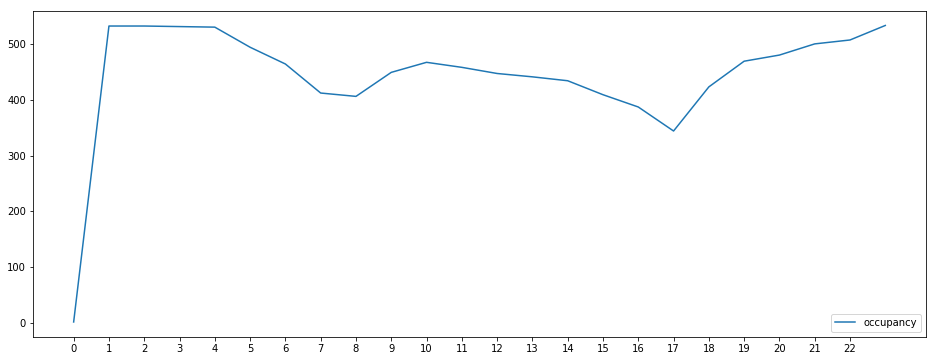

In [554]:
figure(figsize=(16,6))
# aankuur
index = ovin_groups_aankuur_cum.index;
occ = ovin_groups_aankuur_cum.occ
plt.plot(index, occ,label='occupancy')
plt.xticks(np.arange(min(index), max(index), 1.0))
plt.legend()

In [555]:
df_concat = pd.concat([ovin_groups_vertuur, ovin_groups_aankuur], axis=1)
df_concat = df_concat.drop(columns=["AankUur",'VertUur'])
df_concat = df_concat.fillna(0)
df_concat = df_concat.applymap(int)
df_concat
df_concat.to_csv('distribution_departure_arrival_time.csv')

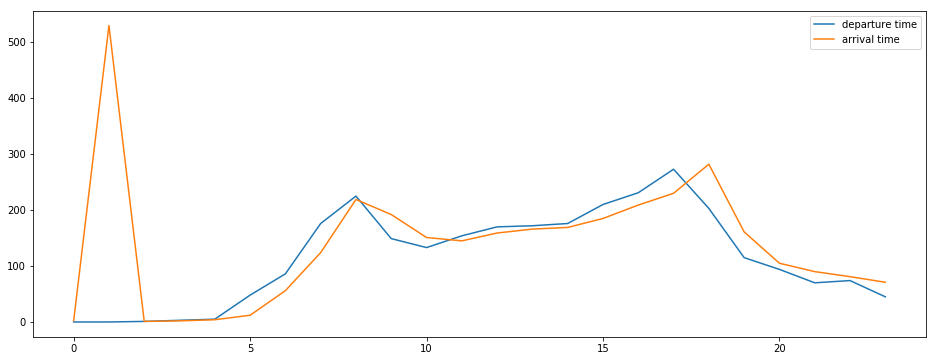

In [437]:
figure(figsize=(16,6))
# aankuur
v_index = ovin_groups_vertuur.index;
v_permit = ovin_groups_vertuur.Permitholder
v_work = ovin_groups_vertuur.Work
v_visit = ovin_groups_vertuur.Visitor
v_total = ovin_groups_vertuur.Total
# vertuur
a_index = ovin_groups_aankuur.index;
a_permit = ovin_groups_aankuur.Permitholder
a_work = ovin_groups_aankuur.Work
a_visit = ovin_groups_aankuur.Visitor
a_total = ovin_groups_aankuur.Total

# plt.axvline(dt.datetime(2018, 7, 22),label='noordzuidlijn',color='red')
# plt.axvline(dt.datetime(2018, 10, 1),label='start removing on street spots',color='blue')
# plt.axvline(dt.datetime(2018, 11, 30),label='end removing on street spots',color='yellow')
# plt.axvline(dt.datetime(2018, 12, 17),label='market vendors enter garage',color='green')
# plt.plot(v_index, v_permit)
# plt.plot(v_index, v_work)
# plt.plot(v_index, v_visit)
plt.plot(v_index, v_total,label='departure time')
# plt.plot(a_index, a_index)
# plt.plot(a_index, a_work)
# plt.plot(a_index, a_visit)
plt.plot(a_index, a_total,label='arrival time')
plt.legend()

In [438]:
ovin_groups['VertUur'].mean()

11.435744172145846

In [439]:
ovin_type['OPID'].nunique()


1367

In [440]:
ovin_type['Permitholder'].sum()

1059

### Permit holder id list (voor parking xml)

In [441]:
ovin_type_opid = ovin_type_opid.loc[ovin_type_opid['OPID'].isin(df_diaries['OPID'].unique())]

In [442]:
total_list = ovin_type_opid['OPID'].unique()

In [443]:
# make list of all permitholders id's
ovin_permitholder = ovin_type_opid.loc[ovin_type_opid['Permitholder'] == 1]
ovin_permitholder_opid_list = ovin_permitholder['OPID'].unique()

len(ovin_permitholder_opid_list)

584

### Non-permit holder id list

In [444]:
non_ovin_permitholder = ovin_type_opid.loc[ovin_type['Permitholder'] != 1]
non_ovin_permitholder_opid_list = non_ovin_permitholder['OPID'].unique()
len(non_ovin_permitholder_opid_list)

783

### Select right amount of agents

In [445]:
permit_pop_1 = 0.48
non_permit_pop_1 = 1 - permit_pop_1

total = 600
permit_amount = int(permit_pop_1*total)
non_permit_amount = int(non_permit_pop_1*total)

# minder mensen
permit_amount = 250
non_permit_amount = 250

In [446]:
permit_pop_1_selected = ovin_permitholder_opid_list[:permit_amount+1]
non_permit_pop_1_selected = non_ovin_permitholder_opid_list[:non_permit_amount+1]

# HIER IS DE PERMIT HOLDER LIST VOOR PARKING.XML
permit_pop_1_selected = permit_pop_1_selected.tolist()
non_permit_pop_1_selected = non_permit_pop_1_selected.tolist()

pop_1_selected = permit_pop_1_selected +non_permit_pop_1_selected

mylist = list(set(pop_1_selected))

In [447]:
permit_pop_2 = 0.375
non_permit_pop_2 = 1 - permit_pop_2
total=800

permit_amount_2 = int(permit_pop_2*total)
non_permit_amount_2 = int(non_permit_pop_2*total)

# minder mensen
permit_amount = 250
non_permit_amount = 300

In [448]:
permit_pop_2_selected = ovin_permitholder_opid_list[:permit_amount_2+1]
non_permit_pop_2_selected = non_ovin_permitholder_opid_list[:non_permit_amount_2+1]

# HIER IS DE PERMIT HOLDER LIST VOOR PARKING.XML
permit_pop_2_selected = permit_pop_2_selected.tolist()
non_permit_pop_2_selected = non_permit_pop_2_selected.tolist()

pop_2_selected = permit_pop_2_selected +non_permit_pop_2_selected
len(pop_2_selected)
mylist = list(set(pop_2_selected))

In [449]:
print(permit_pop_1_selected)

['10101113', '10105032', '10110021', '10115097', '10119034', '10122049', '10130011', '10130056', '10138020', '10207088', '10208002', '10209022', '10215041', '10216071', '10221100', '10223039', '10234069', '10240096', '10246114', '10250068', '10318057', '10326066', '10333058', '10334126', '10338065', '10343133', '10350074', '10350075', '10401020', '10401029', '10404122', '10405094', '10409192', '10412072', '10421081', '10428096', '10428097', '10430061', '10437102', '10442064', '10445037', '10452076', '10509144', '10516077', '10525053', '10533093', '10534094', '10534147', '10541092', '10547126', '11109055', '11111005', '11113019', '11116075', '11120027', '11121008', '11123026', '11124005', '11131033', '11139007', '11206090', '11207122', '11210110', '11211103', '11212033', '11214035', '11214102', '11234138', '11306049', '11311055', '11316091', '11318058', '11328083', '11329088', '11333116', '11337069', '11341057', '11344053', '11402077', '11406103', '11408010', '11414095', '11419048', '11

In [450]:
part = df_diaries[df_diaries['OPID'].isin(pop_1_selected)]

In [451]:
count = 0
for i in permit_pop_1_selected:
    if i not in part['OPID'].unique():
        print(i)
        count +=1
print(count)


0


In [452]:
# #dubbel check of alle ids in diaries zitten
# part_not = df_diaries[~df_diaries['OPID'].isin(pop_1_selected)]

In [453]:
#aantal agents
part['OPID'].nunique()

502

In [454]:
part.loc[part['OPID'] == '14302082']

Empty DataFrame
Columns: [OP, OPID, Jaar, Maand, Week, Dag, Weekdag, Doel, MotiefV, VertPC, Vertrekp, AankPC, Hvm, BHvm, VertUur, VertMin, AankUur, AankMin, Reisduur, HHPers, HHSam, HHLft1, HHLft2, HHLft3, HHLft4, HHGestInkG, Geslacht, Leeftijd, BetWerk, HHAuto, Rijbewijs, WoonPC, Datum, VertTijd, AankTijd, VertTijd2, Verschil, Diff, ActDuur2, ActDuur, ActMinutes, EindTijd, BuurtAdam, VerplNr, VerplID, EindTijdAlt, CatNum, CatText, location_id, dest, orig, VertTijdVolgende, OPIDVolgende, EindTijd2]
Index: []

In [477]:
diary = part[['OPID','VerplID','orig','dest','VertTijd','AankTijd','EindTijd']].iloc[:3].sort_values('VerplID')

In [493]:
diary.columns.values[0] = 'ID'
diary.columns.values[1] = 'Trip ID'
diary.columns.values[2] = 'Origin'
diary.columns.values[3] = 'Destination'
diary.columns.values[4] = 'Time Departure'
diary.columns.values[5] = 'Time Arrival'
diary.columns.values[6] = 'Time End of Activity'

diary.transpose()




0                  145  \
ID                               10101011             10101011   
Trip ID                        1010101101           1010101102   
Origin                               1131                01843   
Destination                         01843                 4105   
Time Departure        2019-02-01T14:15:00  2019-02-01T16:45:00   
Time Arrival          2019-02-01T14:45:00  2019-02-01T18:45:00   
Time End of Activity  2019-02-01T16:45:00  2019-02-01T18:50:00   

                                      146  
ID                               10101113  
Trip ID                        1010111300  
Origin                               2061  
Destination                          0734  
Time Departure        2019-02-01T00:10:00  
Time Arrival          2019-02-01T01:00:00  
Time End of Activity  2019-02-01T11:00:00

In [492]:
diary.to_csv('diary.csv',index=False)

# Pandas to XML 

## IndivDiaries

In [456]:
df_diaries = part.applymap(str)
df_diaries = df_diaries.sort_values(['OPID','VerplID'])
df_diaries.head()
len(df_diaries)

1233

In [457]:
indivDiaries = etree.Element("indivDiaries")
opid_list = []
for index, row in df_diaries.iterrows():
    # if opid is new
    if row['OPID'] not in opid_list:    
        indivDiary = etree.SubElement(indivDiaries,'indivDiary')
        indivDiary.set('owner',row['OPID'])
    
    episode = etree.SubElement(indivDiary, 'episode')
    episode.set('id',row['VerplID'])
    trip = etree.SubElement(episode, 'trip')
    component = etree.SubElement(trip, 'component')
    component.set('id',row['VerplID'])
    component.set('orig',row['orig'])
    component.set('dest',row['dest'])
    component.set('mode','car')
    component.set('t0',row['VertTijd'])
    component.set('t1',row['AankTijd'])
    activity = etree.SubElement(episode, 'activity')
    activity.set('id',row['VerplID'])
    activity.set('type',row['CatText'])
    activity.set('location',row['dest'])
    activity.set('t0',row['AankTijd'])
    activity.set('t1',row['EindTijd'])
    
    opid_list.append(row['OPID'])
    

In [458]:
etree.dump(indivDiaries)

<indivDiaries>
  <indivDiary owner="10101011">
    <episode id="1010101101">
      <trip>
        <component id="1010101101" orig="1131" dest="01843" mode="car" t0="2019-02-01T14:15:00" t1="2019-02-01T14:45:00"/>
      </trip>
      <activity id="1010101101" type="leisure" location="01843" t0="2019-02-01T14:45:00" t1="2019-02-01T16:45:00"/>
    </episode>
    <episode id="1010101102">
      <trip>
        <component id="1010101102" orig="01843" dest="4105" mode="car" t0="2019-02-01T16:45:00" t1="2019-02-01T18:45:00"/>
      </trip>
      <activity id="1010101102" type="home" location="4105" t0="2019-02-01T18:45:00" t1="2019-02-01T18:50:00"/>
    </episode>
  </indivDiary>
  <indivDiary owner="10101113">
    <episode id="1010111300">
      <trip>
        <component id="1010111300" orig="2061" dest="0734" mode="car" t0="2019-02-01T00:10:00" t1="2019-02-01T01:00:00"/>
      </trip>
      <activity id="1010111300" type="home" location="0734" t0="2019-02-01T01:00:00" t1="2019-02-01T11:00:00

## Households

In [459]:
# new id for household based on OPID as only one person per household filled in the survey
df_diaries['HHID'] = df_diaries.groupby(['OPID'],sort=False).ngroup()

In [460]:
df_households = df_diaries.copy()

In [461]:

df_households = df_households[['OPID','HHID','HHPers','HHSam','HHGestInkG','BuurtAdam','WoonPC','HHAuto']]
df_households = df_households.applymap(str)

In [462]:
households = etree.Element("households")
hhid_list = []
for index, row in df_households.iterrows():

    # if person is new
    if row['HHID'] not in hhid_list:    
        household = etree.SubElement(households,'household')
        household.set('id',row['HHID'])
        socioDemo = etree.SubElement(household, 'socioDemo')
        socioDemo.set('H_Persons',row['HHPers'])
        socioDemo.set('H_SocioEconomicClass',row['HHGestInkG'])
        socioDemo.set('H_Composition',row['HHSam'])
        socioDemo.set('H_HouseholdLocationID',row['WoonPC'])
        socioDemo.set('H_NumberOfCars',row['HHAuto'])

    hhid_list.append(row['HHID'])



In [463]:
len(df_households)

1233

In [464]:
etree.dump(households)

<households>
  <household id="0">
    <socioDemo H_Persons="2" H_SocioEconomicClass="3" H_Composition="2" H_HouseholdLocationID="4105" H_NumberOfCars="0"/>
  </household>
  <household id="1">
    <socioDemo H_Persons="1" H_SocioEconomicClass="10" H_Composition="1" H_HouseholdLocationID="1054" H_NumberOfCars="1"/>
  </household>
  <household id="2">
    <socioDemo H_Persons="3" H_SocioEconomicClass="3" H_Composition="3" H_HouseholdLocationID="1616" H_NumberOfCars="1"/>
  </household>
  <household id="3">
    <socioDemo H_Persons="2" H_SocioEconomicClass="7" H_Composition="2" H_HouseholdLocationID="7241" H_NumberOfCars="1"/>
  </household>
  <household id="4">
    <socioDemo H_Persons="1" H_SocioEconomicClass="1" H_Composition="1" H_HouseholdLocationID="1015" H_NumberOfCars="0"/>
  </household>
  <household id="5">
    <socioDemo H_Persons="2" H_SocioEconomicClass="1" H_Composition="6" H_HouseholdLocationID="2101" H_NumberOfCars="1"/>
  </household>
  <household id="6">
    <socioDemo H_

## People

In [465]:
df_people = df_diaries.copy()


In [5780]:
df_people = df_people[['OPID','HHID','HHPers','HHSam','HHLft1','HHLft2','HHLft3','HHLft4','HHGestInkG','BuurtAdam','WoonPC','Geslacht','Leeftijd','BetWerk','HHAuto','Rijbewijs']]
df_people = df_people.applymap(str)

In [5781]:
len(df_people)

1228

In [5782]:
df_people.head()

OPID HHID HHPers HHSam HHLft1 HHLft2 HHLft3 HHLft4 HHGestInkG  \
0     10101113    0      1     1      0      0      0      1         10   
1549  10101113    0      1     1      0      0      0      1         10   
1638  10101128    1      3     3      0      1      0      2          3   
1     10101128    1      3     3      0      1      0      2          3   
1800  10105021    2      2     2      0      0      0      2          7   

     BuurtAdam WoonPC Geslacht Leeftijd BetWerk HHAuto Rijbewijs  
0          nan   1054        2       35       3      1         1  
1549       nan   1054        2       35       3      1         1  
1638       nan   1616        1       54       3      1         1  
1          nan   1616        1       54       3      1         1  
1800       nan   7241        1       66       0      1         1

In [5783]:
people = etree.Element("people")
id_list = []
for index, row in df_people.iterrows():
    # if person is a new person
    if row['OPID'] not in id_list:  
        person = etree.SubElement(people,'person')
        person.set('id',row['OPID'])
        person.set('householdId', row['HHID'])
        socioDemo = etree.SubElement(person, 'socioDemo')
        socioDemo.set('P_Workstatus',row['BetWerk'])
        socioDemo.set('P_Age',row['Leeftijd'])
        socioDemo.set('P_Gender',row['Geslacht'])
        socioDemo.set('P_DriversLicense',row['Rijbewijs'])
    else:
        pass
    
    id_list.append(row['OPID'])
    

In [5784]:
print(len(id_list))

1228


In [5785]:
etree.dump(people)

<people>
  <person id="10101113" householdId="0">
    <socioDemo P_Workstatus="3" P_Age="35" P_Gender="2" P_DriversLicense="1"/>
  </person>
  <person id="10101128" householdId="1">
    <socioDemo P_Workstatus="3" P_Age="54" P_Gender="1" P_DriversLicense="1"/>
  </person>
  <person id="10105021" householdId="2">
    <socioDemo P_Workstatus="0" P_Age="66" P_Gender="1" P_DriversLicense="1"/>
  </person>
  <person id="10105032" householdId="3">
    <socioDemo P_Workstatus="0" P_Age="57" P_Gender="1" P_DriversLicense="1"/>
  </person>
  <person id="10107007" householdId="4">
    <socioDemo P_Workstatus="3" P_Age="26" P_Gender="2" P_DriversLicense="1"/>
  </person>
  <person id="10110021" householdId="5">
    <socioDemo P_Workstatus="0" P_Age="34" P_Gender="2" P_DriversLicense="1"/>
  </person>
  <person id="10115053" householdId="6">
    <socioDemo P_Workstatus="3" P_Age="19" P_Gender="1" P_DriversLicense="1"/>
  </person>
  <person id="10115097" householdId="7">
    <socioDemo P_Workstatu

## Locations

In [5786]:
df_locations = df_locations.applymap(str)

In [5788]:
locations = etree.Element('locations')
# for i in df_merged.iterrows():
    
for i, row in enumerate(df_locations.itertuples(index=False)):
    location = etree.SubElement(locations,'location')
    location.set('id',row[0])
    location.set('x',row[2])
    location.set('y',row[3])
    location.set('crs','EPSG:4326')
    locationActivities = etree.SubElement(location,'locationActivities')
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type',row[1])
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    
    

In [5789]:
etree.dump(locations)

<locations>
  <location id="00" x="4.8894176" y="52.3573483" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="01" x="4.890047099999999" y="52.357503799999996" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="02" x="4.8897702" y="52.3573229" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="03" x="4.8901205" y="52.3575041" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="04" x="4.89020859999

In [5790]:
df_addr_outside = df_addr_outside.applymap(str)

In [5791]:
# locations1 = etree.Element('locations1')    

for index, row in df_addr_outside.iterrows():
    location = etree.SubElement(locations,'location')
    if row['id'] in pc_list:
        location.set('id',row['id'])
    else:
        location.set('id','000')
    location.set('x',row['x'])
    location.set('y',row['y'])
    location.set('crs','EPSG:4326')
    locationActivities = etree.SubElement(location,'locationActivities')
    # home
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','home')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # work
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','work')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # bringGet
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','bringGet')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # dailyShop
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','dailyShop')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # service
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','service')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # socVisit
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','socVisit')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # leisure
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','leisure')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # touring
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','touring')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    # other
    locationActivity = etree.SubElement(locationActivities,'locationActivity')
    locationActivity.set('type','other')
    operations = etree.SubElement(locationActivity,'operations')
    operations.set('type','alwaysOpen')
    
    

In [5792]:
etree.dump(locations)

<locations>
  <location id="00" x="4.8894176" y="52.3573483" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="01" x="4.890047099999999" y="52.357503799999996" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="02" x="4.8897702" y="52.3573229" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="03" x="4.8901205" y="52.3575041" crs="EPSG:4326">
    <locationActivities>
      <locationActivity type="home">
        <operations type="alwaysOpen"/>
      </locationActivity>
    </locationActivities>
  </location>
  <location id="04" x="4.89020859999

# Write to XML

In [ ]:
# with open('/Users/miloubisseling/Documents/UvA/DataScience/Thesis/datascience-thesis/data/simpark/generated/xsd/schedules_feb2.xml','wb') as f:
#     f.write(b'<?xml version="1.0" encoding="UTF-8"?><diaries:diaries xmlns:diaries="ns://be.uhasselt.imob/diaries">')
#     f.write(b'<generated/><validation><validate rule="completenessSchedulesHouseholds"/><validate rule="completenessSchedulesLocations"/><validate rule="completenessSchedulesPeople"/><validate rule="completenessSchedulesDiaries"/><validate rule="completenessMetaValidation"/><validate rule="completenessMetaHouseholds"/><validate rule="completenessMetaPeople"/><validate rule="nonOverlappingOperations"/><validate rule="validPeriodsDiaries"/><validate rule="validPeriodsOperations"/><validate rule="nonOverlappingDiaries"/></validation><gpsRecordings/>')
#     f.write(etree.tostring(households,pretty_print=True))
#     f.write(etree.tostring(people,pretty_print=True))
#     f.write(etree.tostring(locations,pretty_print=True))
#     f.write(etree.tostring(indivDiaries,pretty_print=True))
#     f.write(b'</diaries:diaries>')
    